Code using Turkana county shapefiles to create timeseries for each sub-county for study sites

In [35]:
import numpy as np
import xarray as xr
import scipy
import sys 
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import mapping
import cartopy.crs as ccrs
import cartopy.feature
import warnings
warnings.filterwarnings('ignore')

data_in = "/Volumes/blue_wd/chirps_daily/"
data_out = "/Users/ellendyer/Library/Mobile Documents/com~apple~CloudDocs/1SHARED_WORK/Work/4_ClimateForAL/python_output/data_out/"
plot_out = "/Users/ellendyer/Library/Mobile Documents/com~apple~CloudDocs/1SHARED_WORK/Work/4_ClimateForAL/python_output/plot_out/"

Read in shapefiles with geopandas

In [36]:
shape_c = gpd.read_file('/Users/ellendyer/Library/Mobile Documents/com~apple~CloudDocs/1SHARED_WORK/Work/4_ClimateForAL/shapefiles/Turkana_Boundary.shp')
shape_sc = gpd.read_file('/Users/ellendyer/Library/Mobile Documents/com~apple~CloudDocs/1SHARED_WORK/Work/4_ClimateForAL/shapefiles/Turkana_Subcounties.shp')
shape_w = gpd.read_file('/Users/ellendyer/Library/Mobile Documents/com~apple~CloudDocs/1SHARED_WORK/Work/4_ClimateForAL/shapefiles/Turkana_Wards.shp')
#print(shape_w.keys())
#print(shape_w['ward'].values)
print(shape_c)

   OBJECTID  Shape_Leng  Shape_Area  \
0         1   14.752286    5.572325   

                                            geometry  
0  POLYGON ((35.93203 4.40342, 35.93251 4.40336, ...  


# Rainfall section

Read in CHIRPS (to do: TAMSAT) daily rainfall files

Run this block if you are running the code for the first time to create a smaller rainfall file to use

In [37]:
Y1=1981
Y2=2024
lats=.5
latn=6
lonw=33
lone=37

#for Y in range(Y1,Y2+1):
#    pr_in = xr.open_dataset(data_in+"chirps-v2.0."+str(Y)+".days_p05.nc")['precip']
#    pr_in = pr_in.rename({'latitude':'lat'})
#    pr_in = pr_in.rename({'longitude':'lon'})
#    pr_in = pr_in.sel(lat=slice(lats,latn),lon=slice(lonw,lone))
#    if Y == Y1:
#      pr = pr_in
#    else:
#      pr = xr.concat([pr, pr_in], 'time')
#    del pr_in
#pr.to_netcdf(data_out+'pr_out.nc')

Run this block if you have created a truncated output file

In [38]:
pr=xr.open_dataarray(data_out+'pr_out.nc')

Cut out a ward using the shapefiles and create annual and seasonal mean arrays. All of the different arrays will be put into a single shapefile cut dictionary. 

In [39]:
pr.rio.write_crs("epsg:4326", inplace=True)
prw = {}
for WARD in shape_w['ward'].values: 
    pr_ward = pr.rio.clip(shape_w[shape_w['ward']==WARD].geometry.apply(mapping),
                          shape_w[shape_w['ward']==WARD].crs)
    #Create a dictionary for all the different arrays
    if WARD=='Kaaleng/kaikor Ward':
        WARD='Kaaleng-kaikor Ward'
    if WARD =='Lokiriama/Lorengippi Ward':
        WARD='Lokiriama-Lorengippi Ward'
    if WARD =='Kapedo/napeitom Ward':
        WARD='Kapedo-napeitom Ward'
    if WARD=='Kotaruk/Lobei Ward':
        WARD='Kotaruk-Lobei Ward'
    if WARD=='Lokori/kochodin Ward':
        WARD='Lokori-kochodin Ward'
    prw[WARD] = {}
    prw[WARD]['Full_ts'] = pr_ward
    prw[WARD]['MAM'] = pr_ward.sel(time=pr_ward.time.dt.month.isin([3,4,5]))
    prw[WARD]['JJA'] = pr_ward.sel(time=pr_ward.time.dt.month.isin([6,7,8]))
    prw[WARD]['S'] = pr_ward.sel(time=pr_ward.time.dt.month.isin([9]))
    prw[WARD]['OND'] = pr_ward.sel(time=pr_ward.time.dt.month.isin([10,11,12]))
    prw[WARD]['JF'] = pr_ward.sel(time=pr_ward.time.dt.month.isin([1,2]))

Create a time averaged spatial map of the rainfall in the ward:
- annual mean
- seasonal means

Nakalale Ward


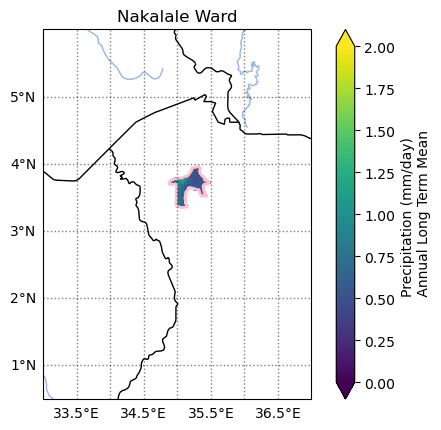

<Figure size 640x480 with 0 Axes>

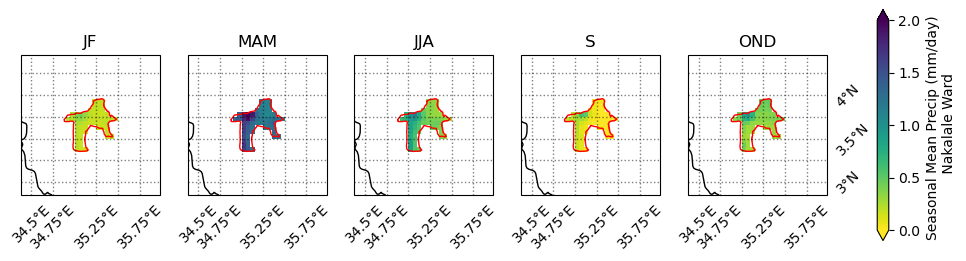

Kaeris Ward


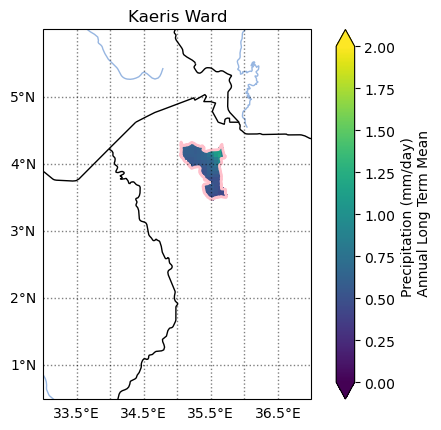

<Figure size 640x480 with 0 Axes>

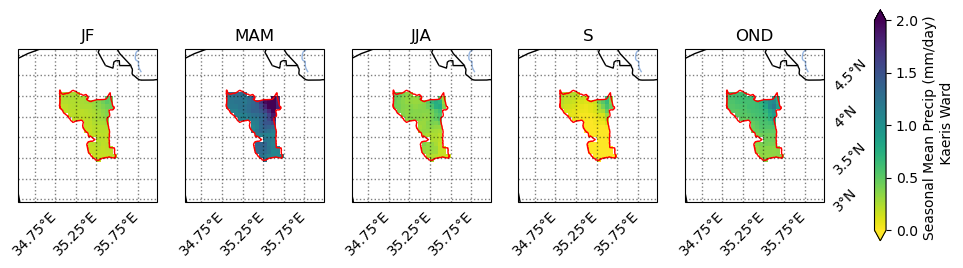

Lakezone Ward


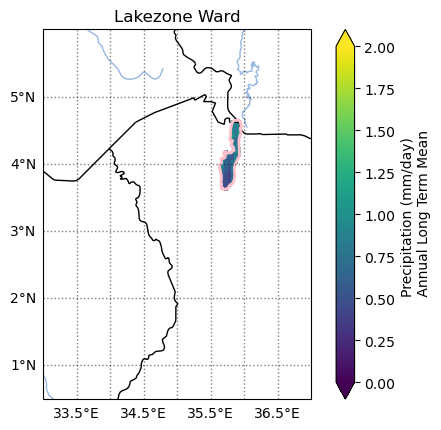

<Figure size 640x480 with 0 Axes>

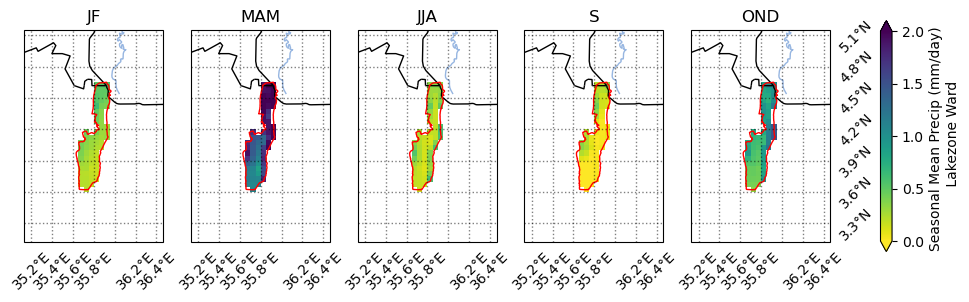

Lapur Ward


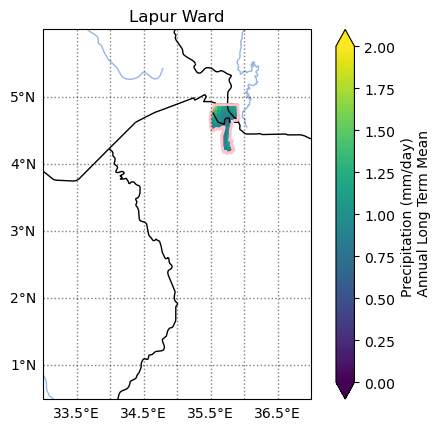

<Figure size 640x480 with 0 Axes>

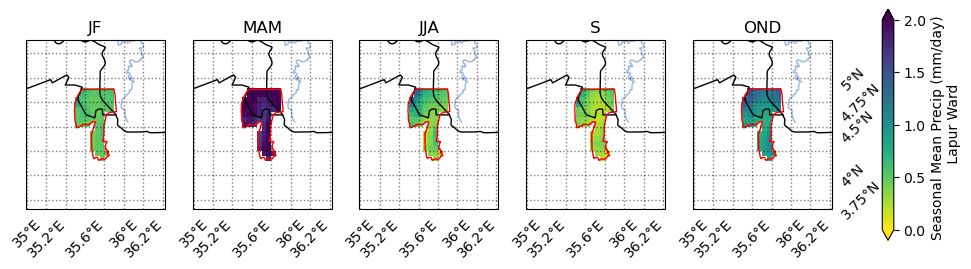

Kaaleng/kaikor Ward


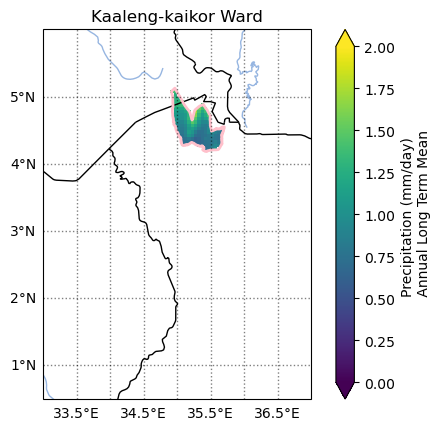

<Figure size 640x480 with 0 Axes>

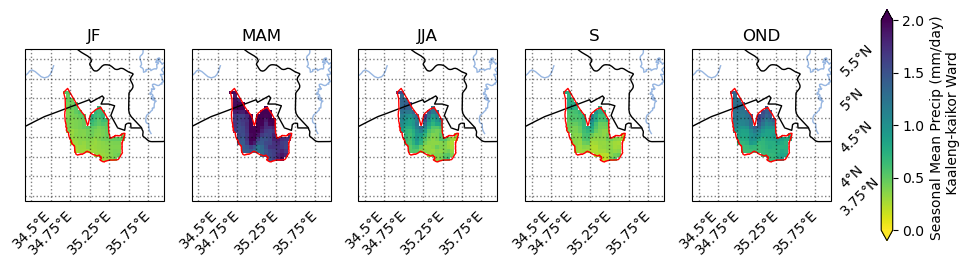

Lopur Ward


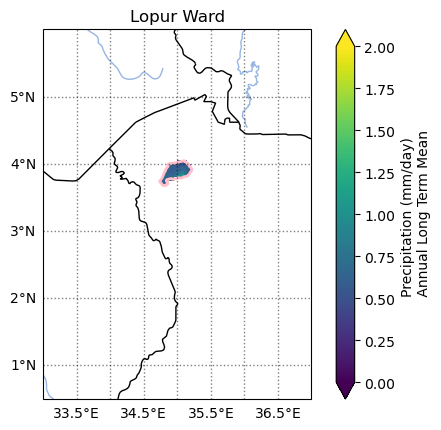

<Figure size 640x480 with 0 Axes>

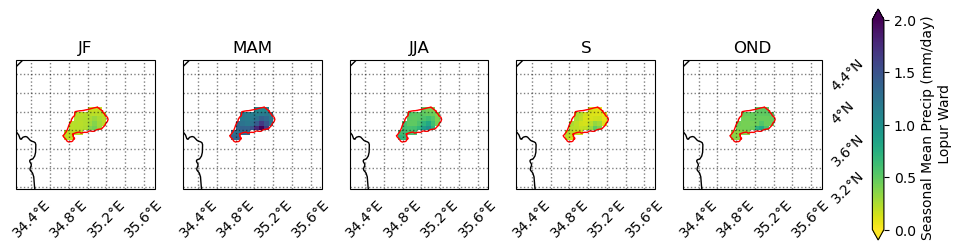

Letea Ward


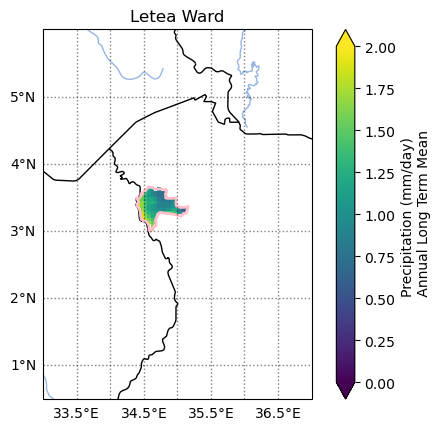

<Figure size 640x480 with 0 Axes>

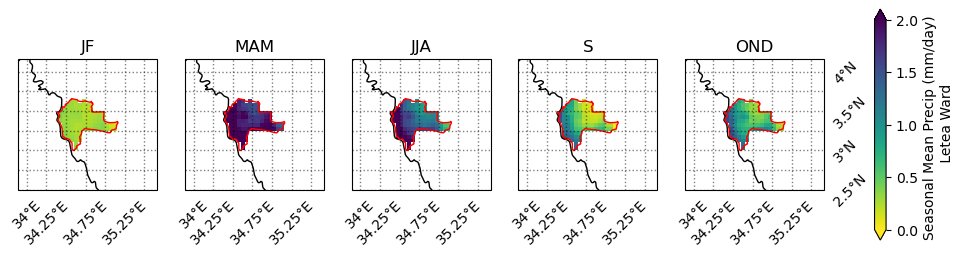

Songot Ward


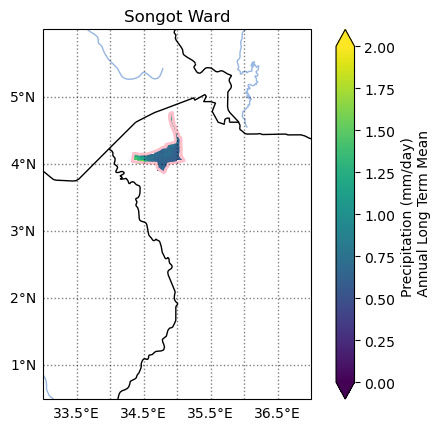

<Figure size 640x480 with 0 Axes>

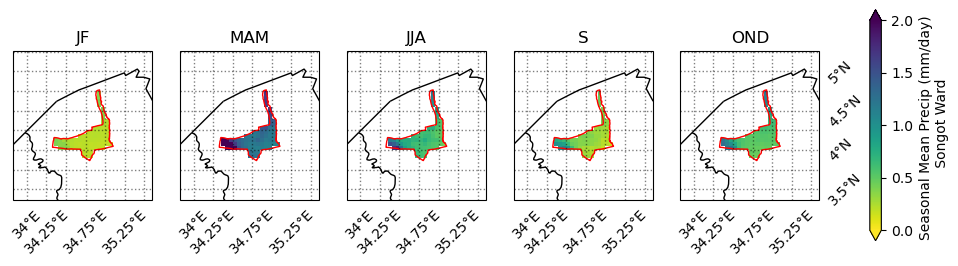

Kerio Delta Ward


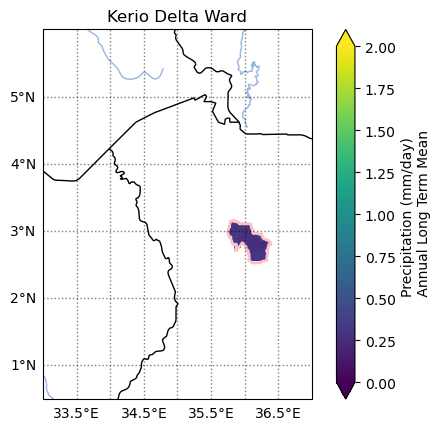

<Figure size 640x480 with 0 Axes>

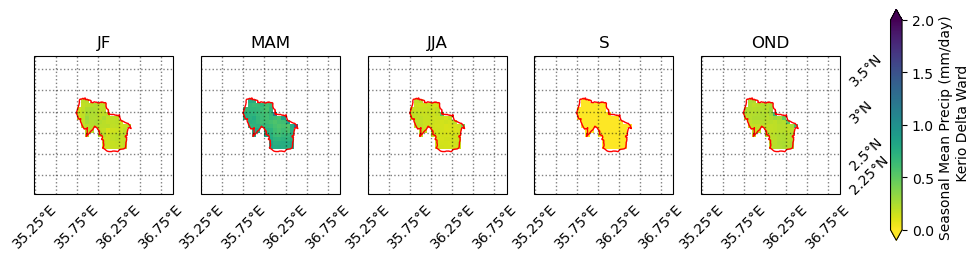

KANG'ATOTHA Ward


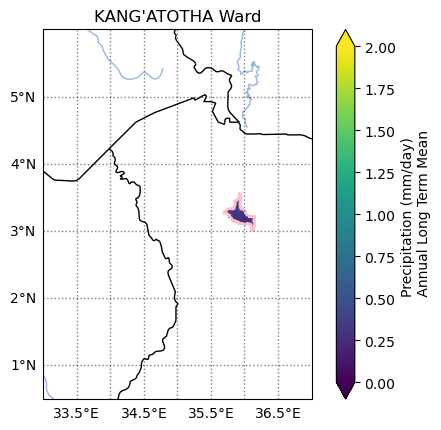

<Figure size 640x480 with 0 Axes>

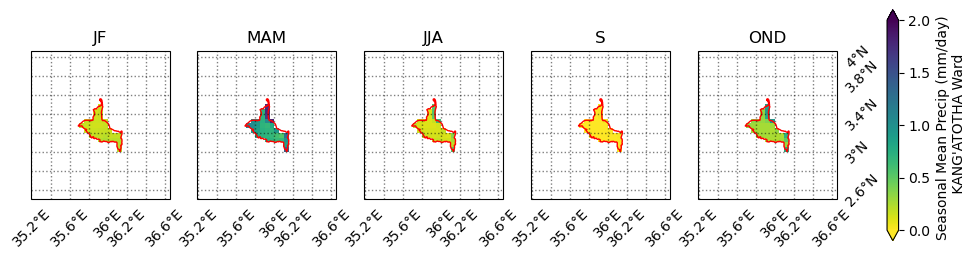

Kalokol Ward


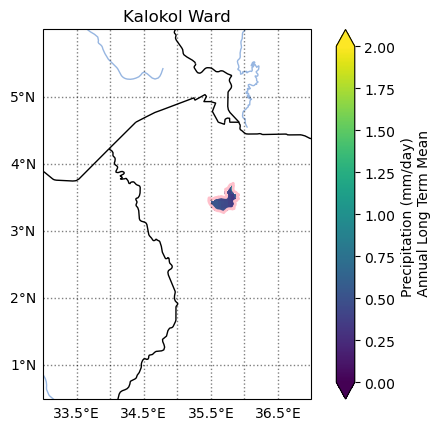

<Figure size 640x480 with 0 Axes>

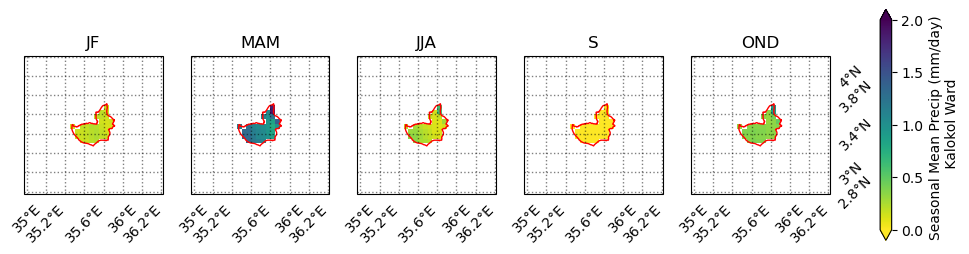

Kibish Ward


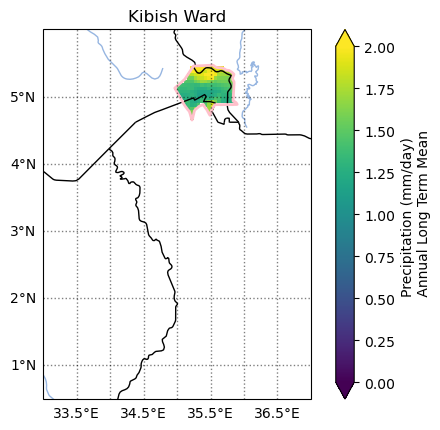

<Figure size 640x480 with 0 Axes>

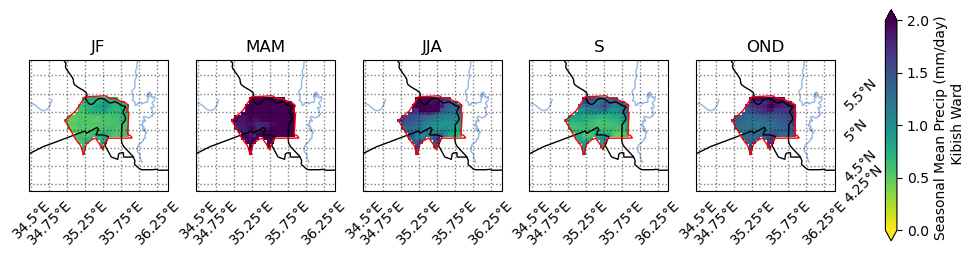

Lokichoggio Ward


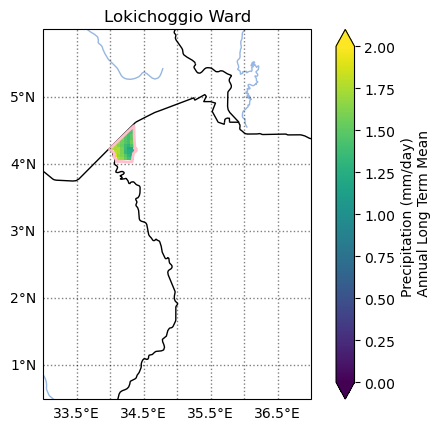

<Figure size 640x480 with 0 Axes>

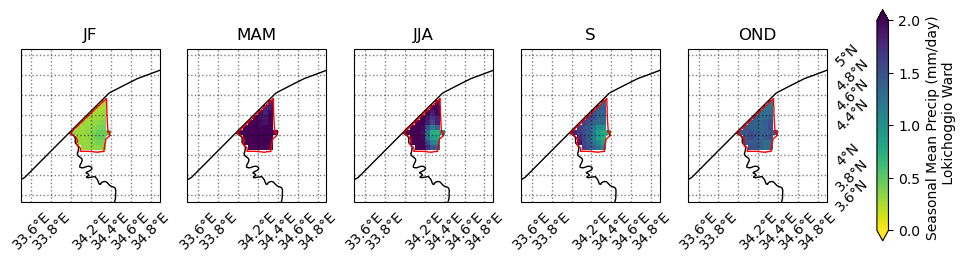

Turkwel Ward


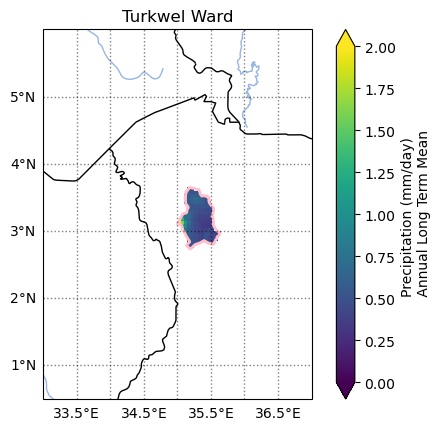

<Figure size 640x480 with 0 Axes>

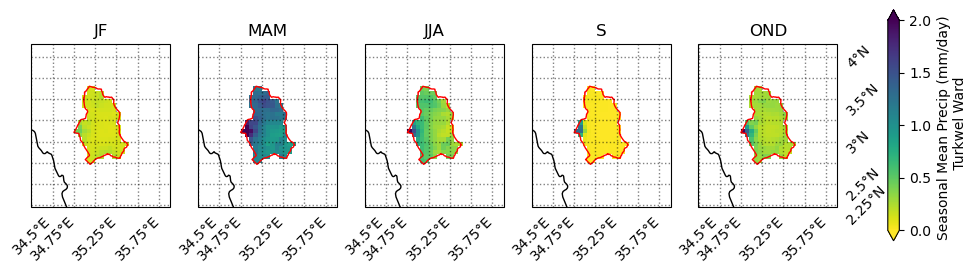

Lokiriama/Lorengippi Ward


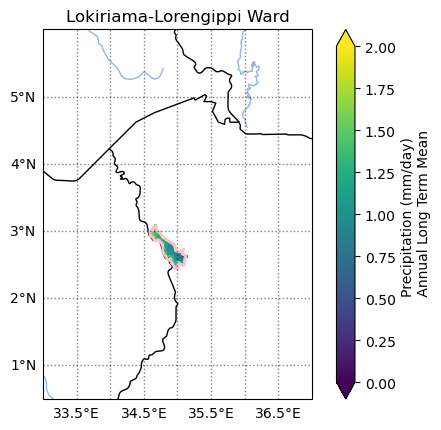

<Figure size 640x480 with 0 Axes>

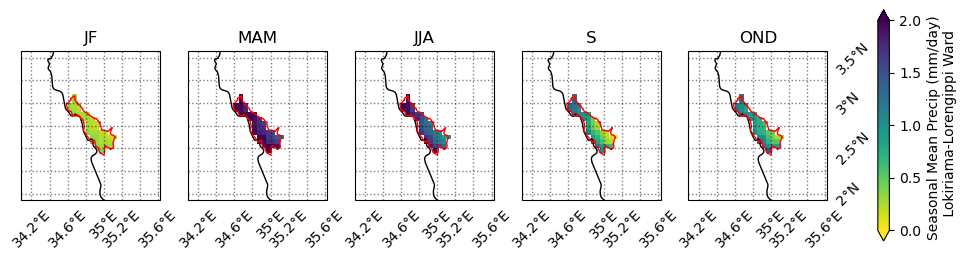

Kaputir Ward


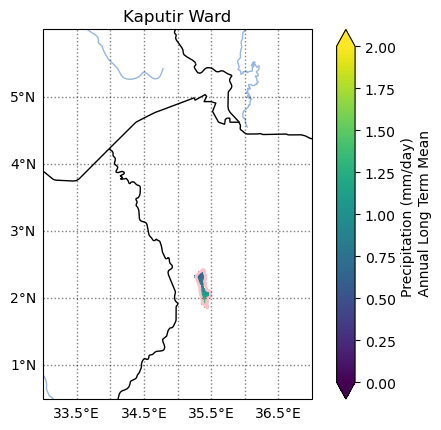

<Figure size 640x480 with 0 Axes>

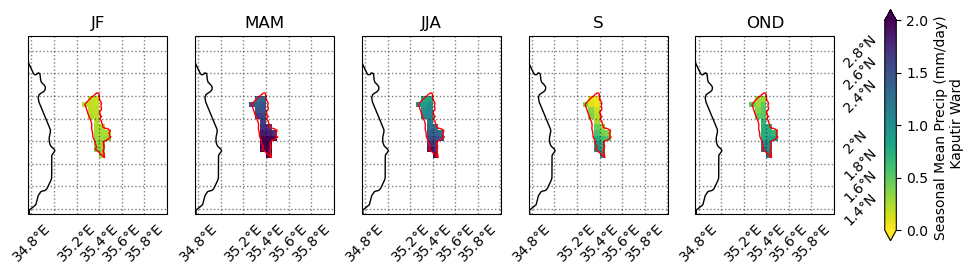

Lobokat Ward


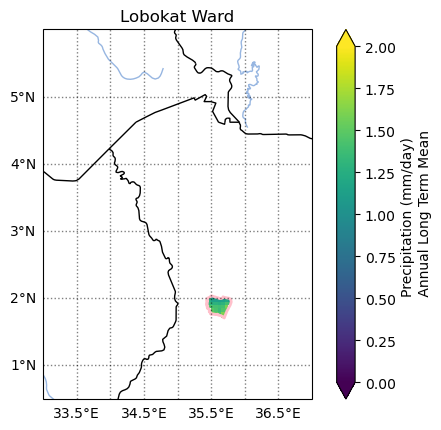

<Figure size 640x480 with 0 Axes>

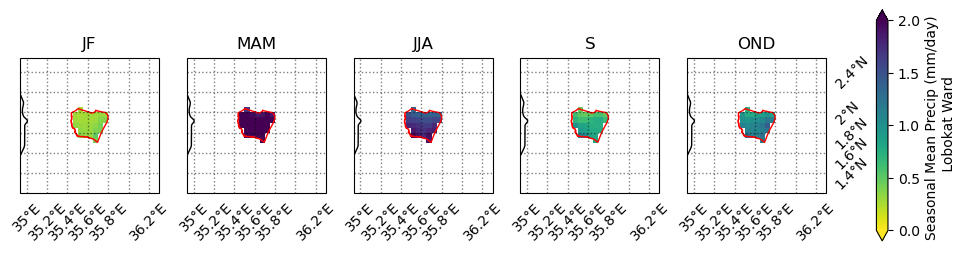

Kalapata Ward


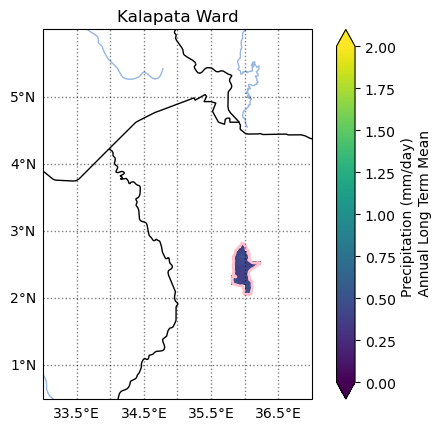

<Figure size 640x480 with 0 Axes>

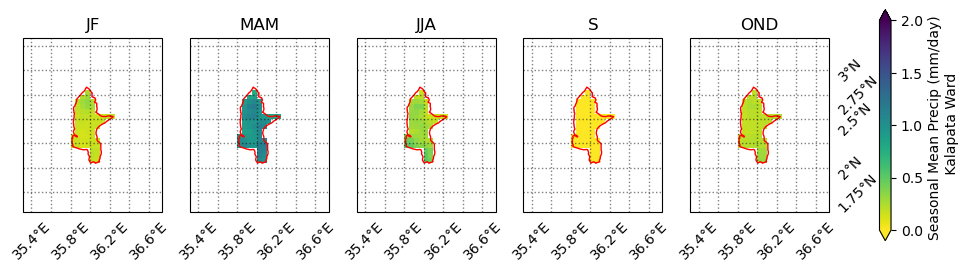

Lokichar Ward


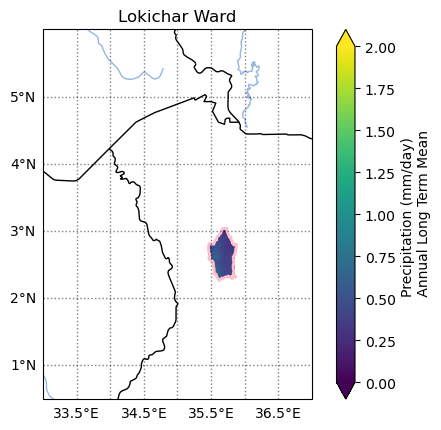

<Figure size 640x480 with 0 Axes>

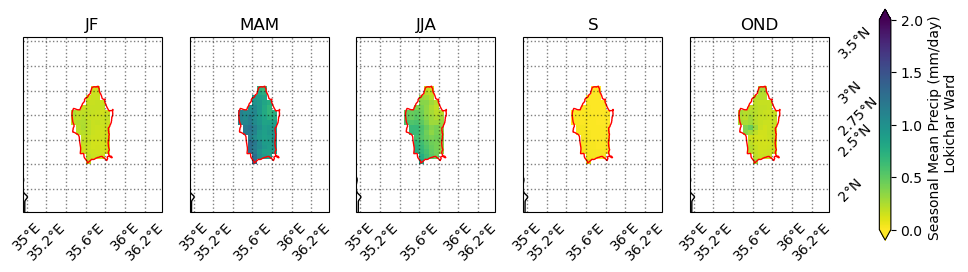

Kapedo/napeitom Ward


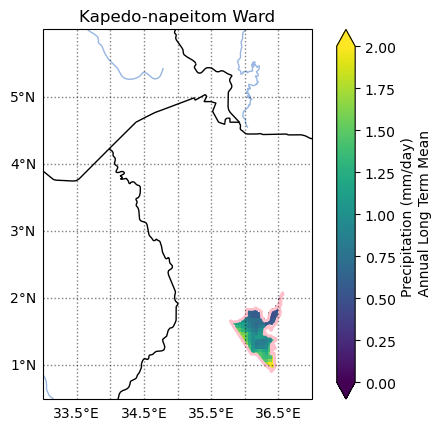

<Figure size 640x480 with 0 Axes>

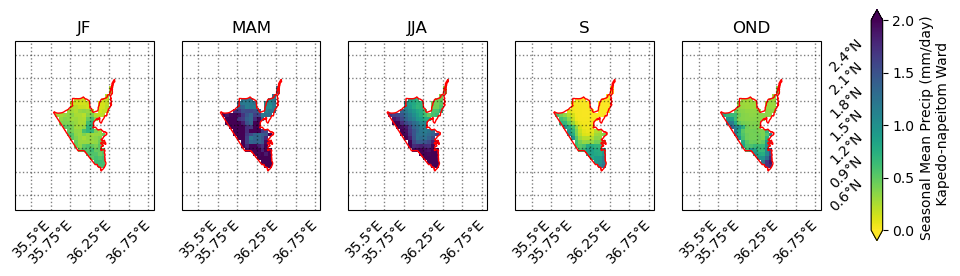

Kakuma Ward


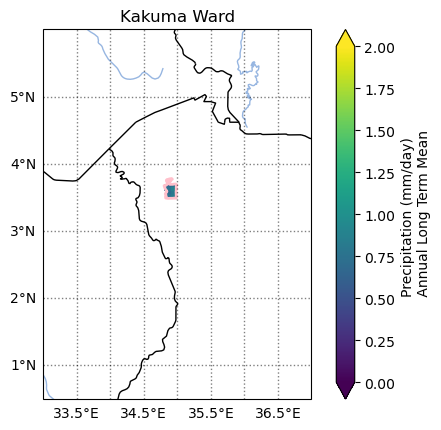

<Figure size 640x480 with 0 Axes>

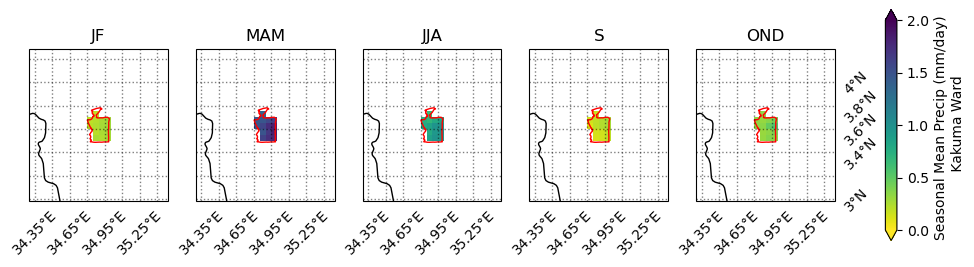

Kalobeyei Ward


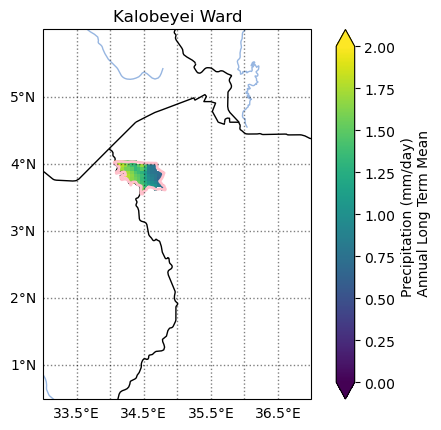

<Figure size 640x480 with 0 Axes>

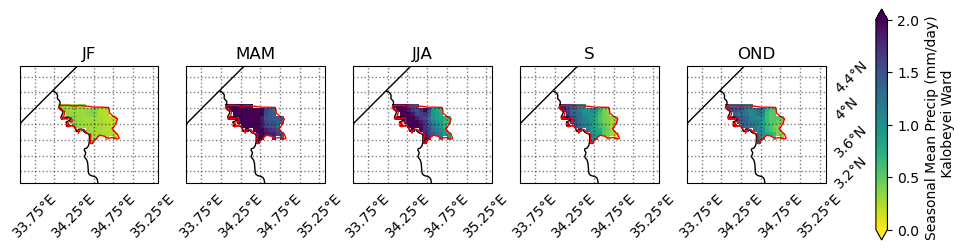

Nanaam Ward


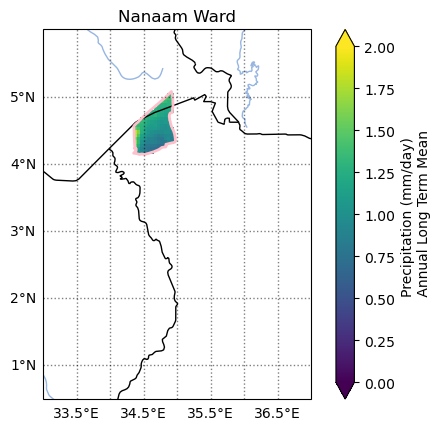

<Figure size 640x480 with 0 Axes>

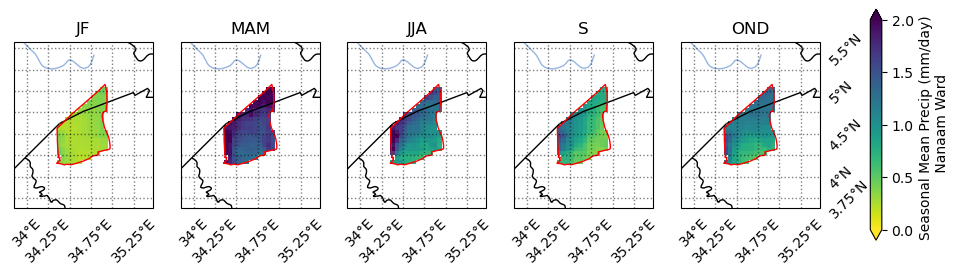

Lodwar Township Ward


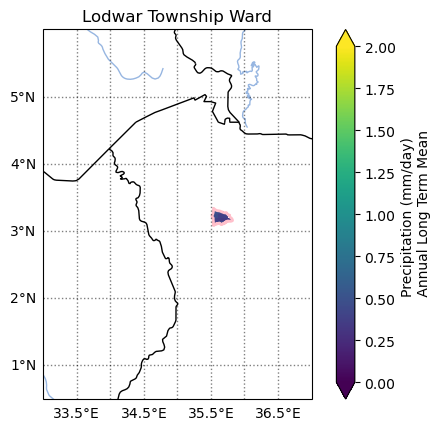

<Figure size 640x480 with 0 Axes>

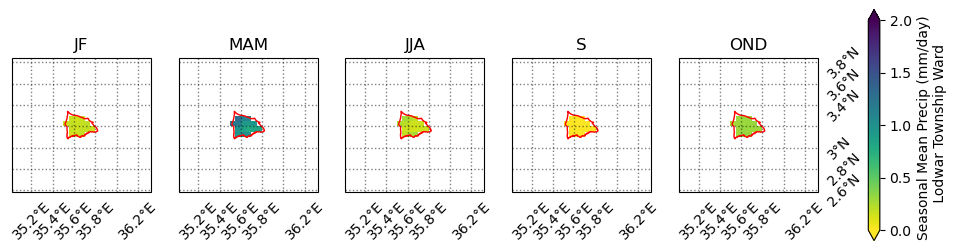

Kanamkemer Ward


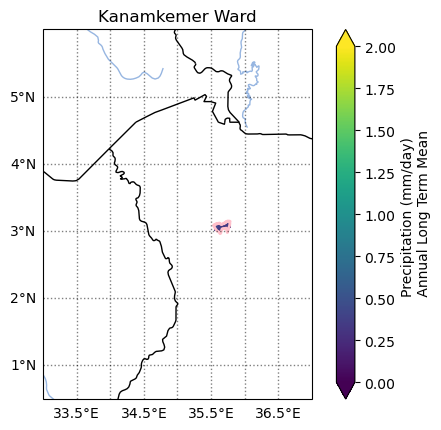

<Figure size 640x480 with 0 Axes>

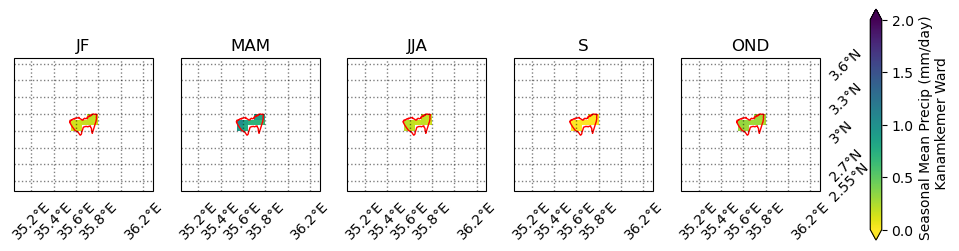

Kotaruk/Lobei Ward


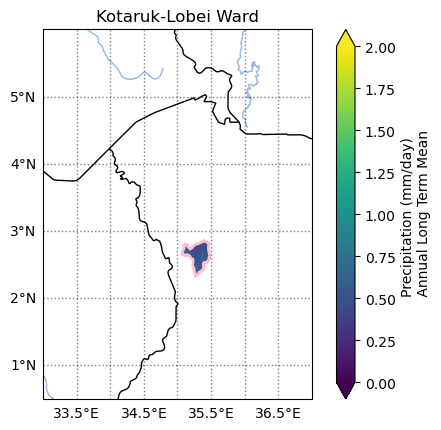

<Figure size 640x480 with 0 Axes>

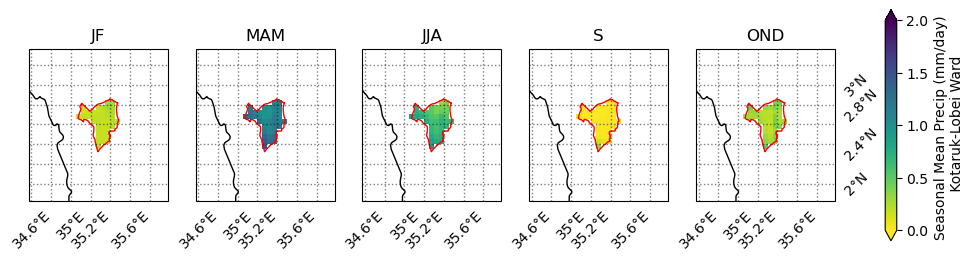

Loima Ward


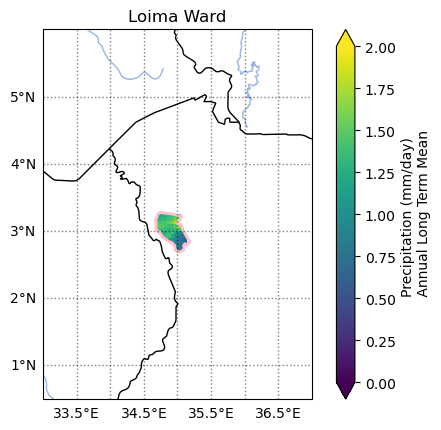

<Figure size 640x480 with 0 Axes>

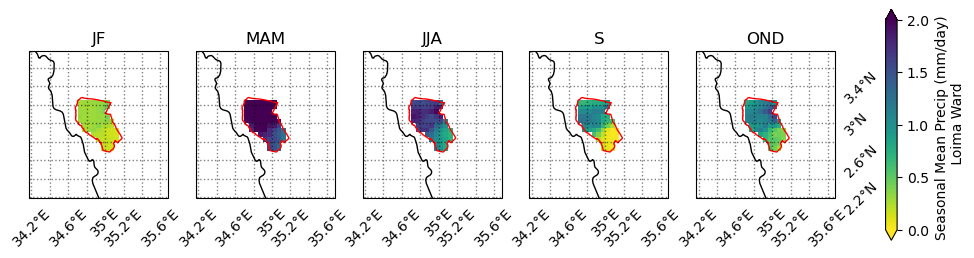

Katilu Ward


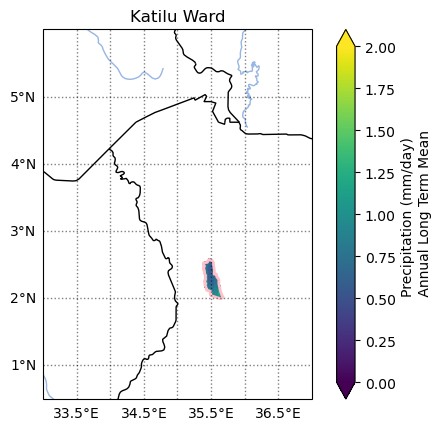

<Figure size 640x480 with 0 Axes>

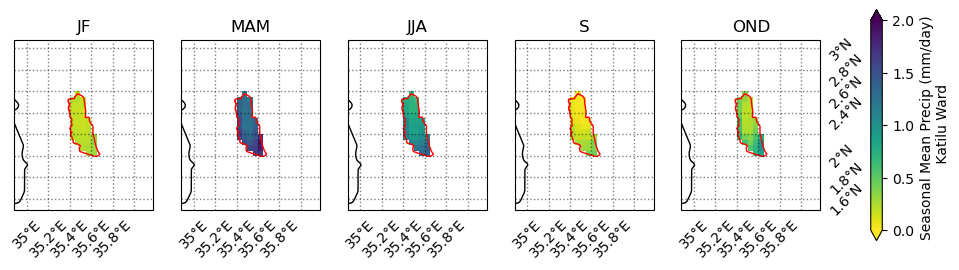

Katilia Ward


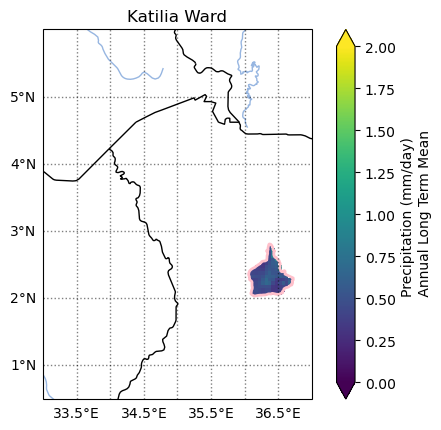

<Figure size 640x480 with 0 Axes>

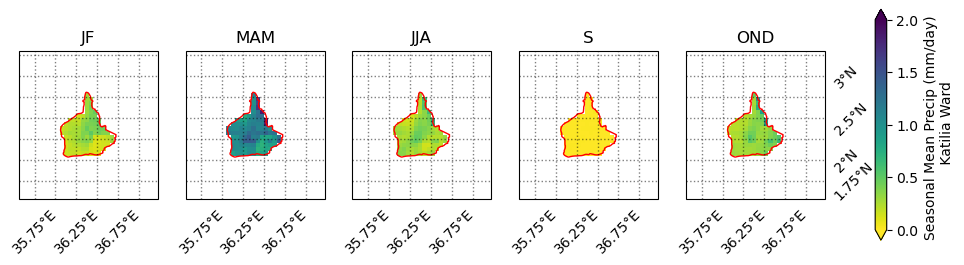

Lokori/kochodin Ward


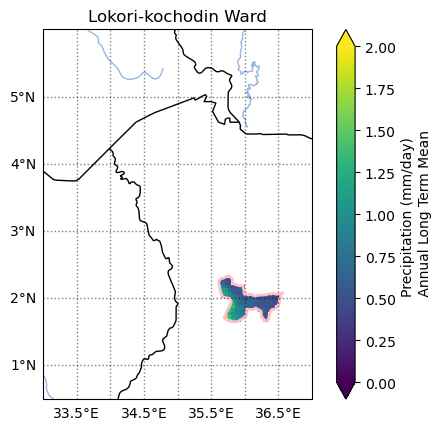

<Figure size 640x480 with 0 Axes>

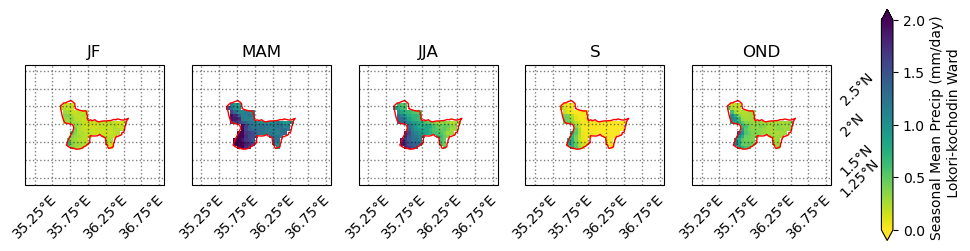

<Figure size 640x480 with 0 Axes>

In [40]:
for WARD in shape_w['ward']:
    print(WARD) 
    shp = shape_w[shape_w['ward']==WARD]
    if WARD=='Kaaleng/kaikor Ward':
        WARD='Kaaleng-kaikor Ward'
    if WARD =='Lokiriama/Lorengippi Ward':
        WARD='Lokiriama-Lorengippi Ward'
    if WARD =='Kapedo/napeitom Ward':
        WARD='Kapedo-napeitom Ward'
    if WARD=='Kotaruk/Lobei Ward':
        WARD='Kotaruk-Lobei Ward'
    if WARD=='Lokori/kochodin Ward':
        WARD='Lokori-kochodin Ward'
    #Annual mean
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.add_feature(cartopy.feature.BORDERS)
    ax.add_feature(cartopy.feature.RIVERS)
    ax.add_feature(cartopy.feature.OCEAN)
    #Overlay with all ward outline
    shp.plot(ax=ax, edgecolor='pink',facecolor='none',lw=2,zorder=2,linestyle='-')
    #Plot data
    prw[WARD]['Full_ts'].mean('time').plot(ax=ax,transform=ccrs.PlateCarree(),
                                           add_colorbar=True,vmin=0,vmax=2,extend="both",
                                           cbar_kwargs={"label": "Precipitation (mm/day) \n Annual Long Term Mean"})
    # for extent the order is  [West,East,South,North]
    ax.set_extent([lonw, lone, lats, latn])
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='black', alpha=0.5, linestyle='dotted')
    gl.top_labels = False
    gl.right_labels = False
    ax.set_title(WARD)
    plt.savefig(plot_out+"pr_ann_"+WARD+".png")
    plt.show()
    plt.clf()
    
    # Seasonal means
    fig, axes = plt.subplots(ncols=5, figsize=(13, 4),subplot_kw={'projection': ccrs.PlateCarree()},sharey=True)
    for i, seas in enumerate(("JF", "MAM", "JJA", "S", "OND")):
        im = prw[WARD][seas].mean('time').plot.pcolormesh(
        ax=axes[i],
        transform=ccrs.PlateCarree(),
        vmin=0,
        vmax=2,
        cmap="viridis_r",
        add_colorbar=False,
        extend="both",
        )   
        axes[i].add_feature(cartopy.feature.BORDERS)
        axes[i].add_feature(cartopy.feature.RIVERS)
        shp.plot(ax=axes[i], edgecolor='red', facecolor='none',lw=1,zorder=2,linestyle='-')
        axes[i].set_extent([shp.bounds['minx']-0.5, shp.bounds['maxx']+0.5, shp.bounds['miny']-0.5, shp.bounds['maxy']+0.5])
        gl = axes[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='black', alpha=0.5, linestyle='dotted')
        gl.xlabel_style = {'rotation': 45}
        gl.ylabel_style = {'rotation': 45}
        gl.top_labels = False
        gl.right_labels = False
        gl.left_labels = False
        axes[i].set_title(seas)
        if i!=0:
            axes[i].set_xlabel('')
            axes[i].set_ylabel('')
        if i==0:
            axes[i].set_xlabel('')
            axes[i].set_ylabel(WARD)
            axes[i].yaxis.get_label().set_visible(True)
        if i==4:
            gl.right_labels = True
    fig.colorbar(im, ax=axes,extend='both', shrink=0.75,label="Seasonal Mean Precip (mm/day) \n "+WARD)   
    plt.tight_layout
    plt.savefig(plot_out+"pr_seas_"+WARD+".png")
    plt.show()
    plt.clf()
    

Analyse seasonal rainfall characteristics by ward:
- currently looking at the percent of the season above a high rainfall threshold and what amount of seasonal rainfall is delivered by these

In [41]:

#Counting the number of days where rain is over a threshold amount
thresh = 1.5
for WARD in shape_w['ward']:
    print(WARD) 
    shp = shape_w[shape_w['ward']==WARD]
    if WARD=='Kaaleng/kaikor Ward':
        WARD='Kaaleng-kaikor Ward'
    if WARD =='Lokiriama/Lorengippi Ward':
        WARD='Lokiriama-Lorengippi Ward'
    if WARD =='Kapedo/napeitom Ward':
        WARD='Kapedo-napeitom Ward'
    if WARD=='Kotaruk/Lobei Ward':
        WARD='Kotaruk-Lobei Ward'
    if WARD=='Lokori/kochodin Ward':
        WARD='Lokori-kochodin Ward'
    for i, seas in enumerate(("JF", "MAM", "JJA", "S", "OND")):
        abt = prw[WARD][seas].where((prw[WARD][seas]>thresh), drop=True)
        abt_count = abt.groupby('time.year').count(dim='time')
        abt_count = abt_count.mean(dim=('year','lat','lon')).values
        
        #Counting the number of days where rain is below threshold amount
        thresh = 0.5
        bt = prw[WARD][seas].where((prw[WARD][seas]<thresh), drop=True)
        bt_count = bt.groupby('time.year').count(dim='time')
        bt_count = bt_count.mean(dim=('year','lat','lon')).values
        
        #Accumulation of seasonal rainfall
        accum = prw[WARD][seas].groupby('time.year').sum(dim='time')
        accum = accum.mean(dim=('year','lat','lon')).values
        
        #Accumulation of rainfall on heavy rain days
        accumh = abt.groupby('time.year').sum(dim='time')
        accumh = accumh.mean(dim=('year','lat','lon')).values
        
        print(WARD,'-',seas)
        print('Count above threshold (yearly ward average): ',abt_count)
        print('Count below threshold (yearly ward average): ',bt_count)
        print('Accumulated total seasonal rainfall (yearly ward average): ',accum)
        print('Accumulated above threshold seasonal rainfall (yearly ward average): ',accumh)
        print('Percent of rainfall coming from above threshold days: %',100.0*(accumh/accum))

Nakalale Ward
Nakalale Ward - JF
Count above threshold (yearly ward average):  0.9831123737373737
Count below threshold (yearly ward average):  23.621685606060606
Accumulated total seasonal rainfall (yearly ward average):  4.8734093
Accumulated above threshold seasonal rainfall (yearly ward average):  4.783975
Percent of rainfall coming from above threshold days: % 98.164856
Nakalale Ward - MAM
Count above threshold (yearly ward average):  5.53582702020202
Count below threshold (yearly ward average):  32.797506313131315
Accumulated total seasonal rainfall (yearly ward average):  52.0427
Accumulated above threshold seasonal rainfall (yearly ward average):  52.032642
Percent of rainfall coming from above threshold days: % 99.98067
Nakalale Ward - JJA
Count above threshold (yearly ward average):  2.394412878787879
Count below threshold (yearly ward average):  35.93892045454545
Accumulated total seasonal rainfall (yearly ward average):  20.72806
Accumulated above threshold seasonal rainfal

Calculate the number of seasons and their onset and cessation dates from a regional mean of the Turkana county rainfall
- this calculation is based on the cumulative method

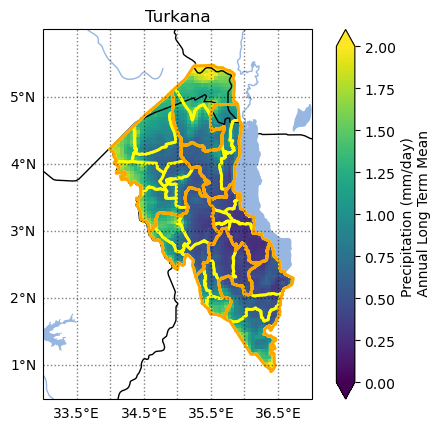

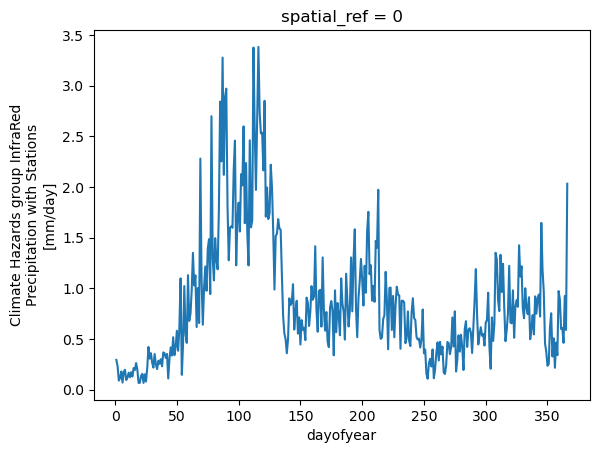

Turkana County


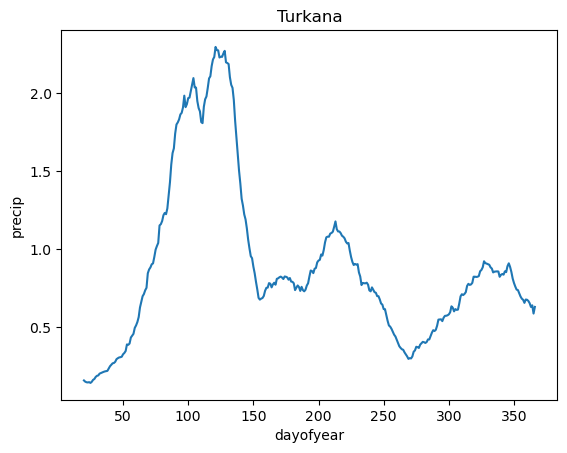

p1 0.06
p2 0.05
p3 0.06


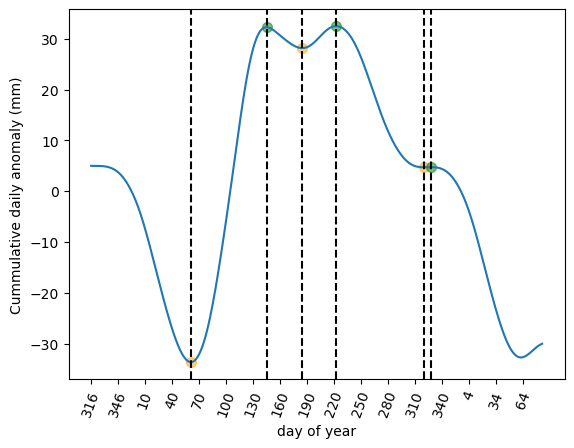

Season 1 -  base:  61 145 lt avg:  76.0 133.9268292682927
Season 2 -  base:  184 222 lt avg:  190.10344827586206 214.17241379310346
Season 3 -  base:  320 328 lt avg:  310.64285714285717 326.7142857142857


<Figure size 640x480 with 0 Axes>

In [42]:
#Characteristic onset and cessation dates for accumulation method
import ts_onset_cess as onc
pr_turkana = pr.rio.clip(shape_c.geometry.apply(mapping),shape_c.crs)
#pr_turkana = pr_turkana.sel(lat=slice(3,6))

#Annual mean
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.RIVERS)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAKES)
#Overlay with all ward outline
shape_c.plot(ax=ax, edgecolor='pink',facecolor='none',lw=2,zorder=2,linestyle='-')
shape_w.plot(ax=ax, edgecolor='yellow',facecolor='none',lw=2,zorder=2,linestyle='-')
shape_sc.plot(ax=ax, edgecolor='orange',facecolor='none',lw=2,zorder=2,linestyle='-')
#Plot data
pr_turkana.mean('time').plot(ax=ax,transform=ccrs.PlateCarree(),
                                       add_colorbar=True,vmin=0,vmax=2,extend="both",
                                       cbar_kwargs={"label": "Precipitation (mm/day) \n Annual Long Term Mean"})
# for extent the order is  [West,East,South,North]
ax.set_extent([lonw, lone, lats, latn])
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='black', alpha=0.5, linestyle='dotted')
gl.top_labels = False
gl.right_labels = False
ax.set_title('Turkana')
#plt.savefig(plot_out+"pr_ann_"+WARD+".png")
plt.show()
plt.clf()

#Daily climatology of long term mean Turkana rainfall
t_day = pr_turkana.groupby('time.dayofyear').mean(dim=('time','lat','lon'))
t_day.plot()
plt.show()
plt.clf()

#Turkana county seasons and onset and cessation dates
print('Turkana County')
ptts = pr_turkana.mean(dim=('lat','lon'))
ptday = ptts.groupby('time.dayofyear').mean('time')
ptday.rolling(dayofyear=20).mean().plot()
plt.title('Turkana')
plt.show()
plt.clf()
power_ratio,on1,ce1,on2,ce2,on3,ce3,on1_years,ce1_years,on2_years,ce2_years,on3_years,ce3_years = onc.xarray_on_cess_point(pr_turkana.mean(dim=('lat','lon')))
print('Season 1 - ', 'base: ',on1, ce1, 'lt avg: ', on1_years.mean().values, ce1_years.mean().values)
print('Season 2 - ', 'base: ',on2, ce2, 'lt avg: ', on2_years.mean().values, ce2_years.mean().values)
print('Season 3 - ', 'base: ',on3, ce3, 'lt avg: ', on3_years.mean().values, ce3_years.mean().values)

- Calculate daily climatology of rainfall averaged for each ward
- Calculate the number of seasons and onset and cessation dates for average rainfall in each ward
- Using the cumulative method

Nakalale Ward


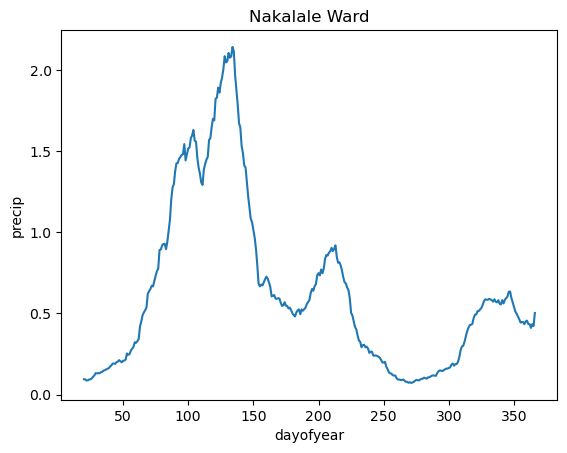

p1 0.06
p2 0.04
p3 0.04


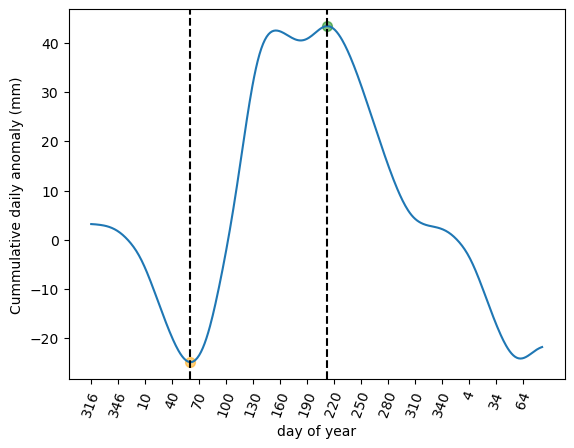

Season 1 -  base:  [60] [212] lt avg:  78.675 164.55
Season 2 -  base:  nan nan lt avg:  nan nan
Season 3 -  base:  nan nan lt avg:  nan nan
Kaeris Ward


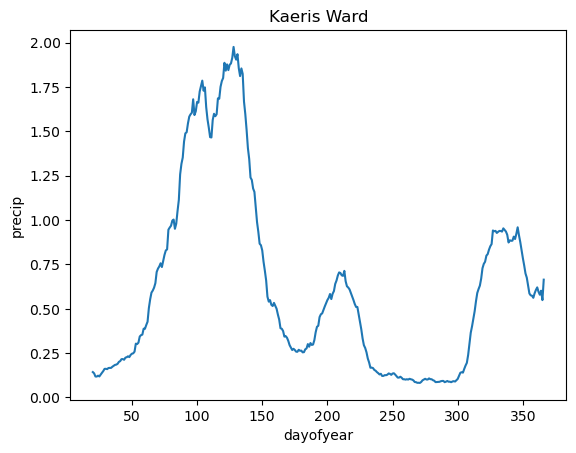

p1 0.05
p2 0.05
p3 0.05


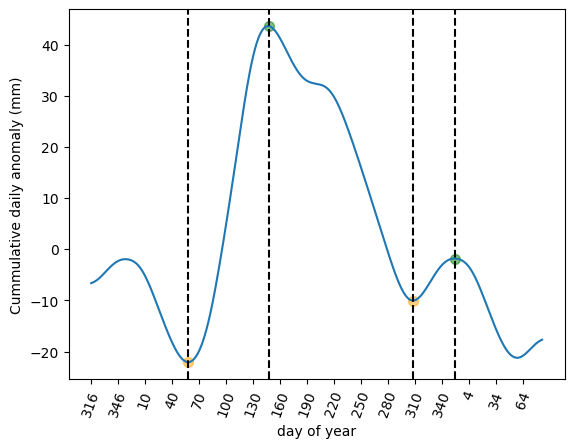

Season 1 -  base:  58 147 lt avg:  75.71428571428571 130.64285714285714
Season 2 -  base:  307 354 lt avg:  319.7352941176471 319.2647058823529
Season 3 -  base:  nan nan lt avg:  nan nan
Lakezone Ward


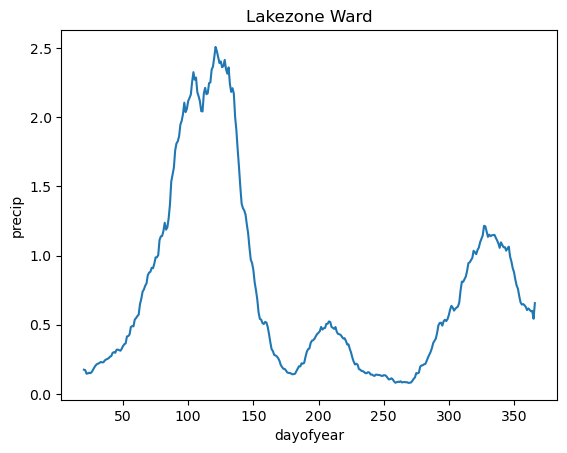

p1 0.05
p2 0.07
p3 0.05


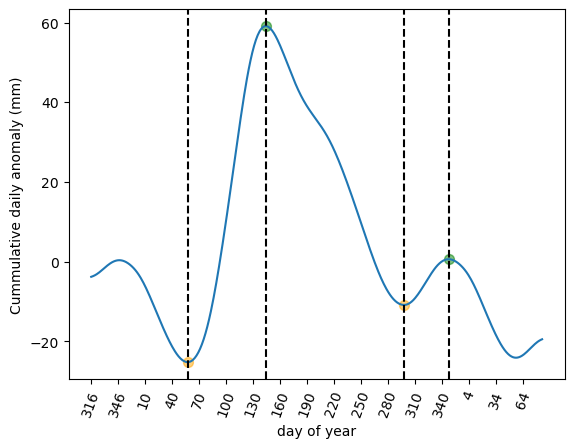

Season 1 -  base:  57 144 lt avg:  69.34146341463415 129.5609756097561
Season 2 -  base:  297 347 lt avg:  308.15625 325.71875
Season 3 -  base:  nan nan lt avg:  nan nan
Lapur Ward


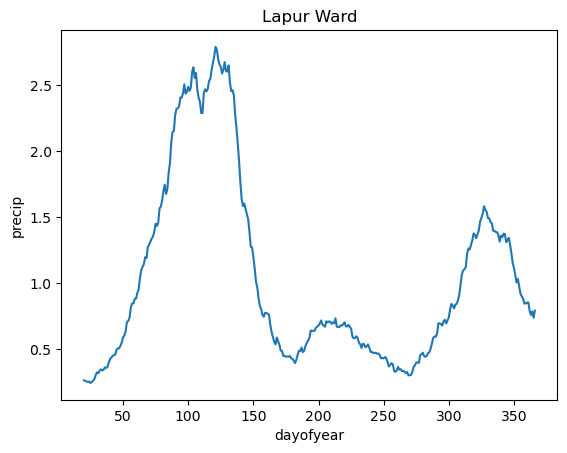

p1 0.05
p2 0.06
p3 0.05


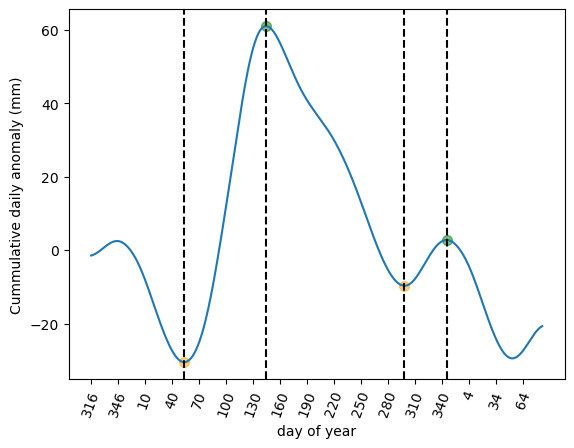

Season 1 -  base:  53 144 lt avg:  66.90243902439025 134.5121951219512
Season 2 -  base:  298 345 lt avg:  305.1034482758621 336.0
Season 3 -  base:  nan nan lt avg:  nan nan
Kaaleng-kaikor Ward


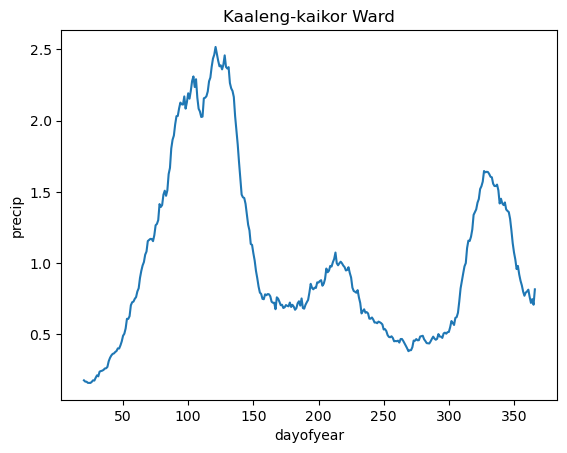

p1 0.03
p2 0.05
p3 0.05


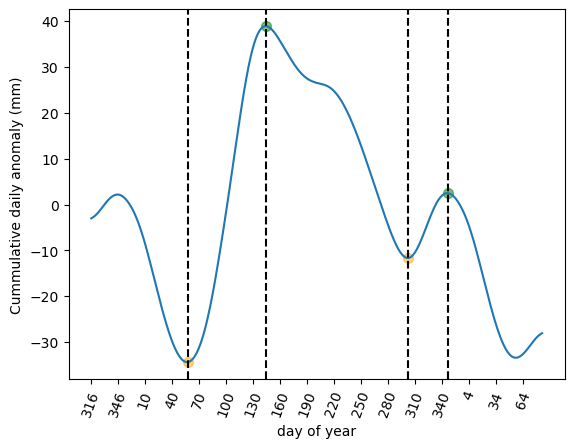

Season 1 -  base:  57 144 lt avg:  73.36585365853658 132.65853658536585
Season 2 -  base:  302 346 lt avg:  310.0 339.62068965517244
Season 3 -  base:  nan nan lt avg:  nan nan
Lopur Ward


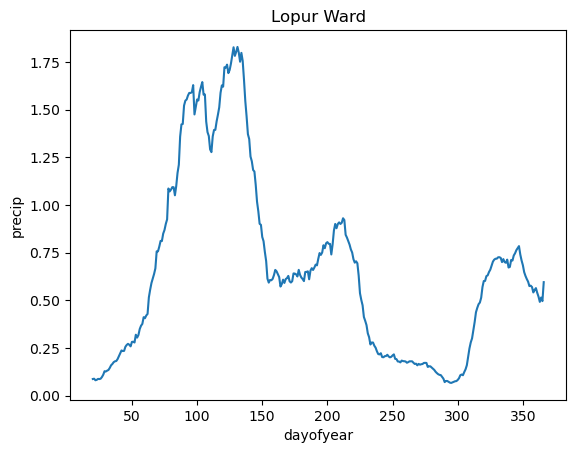

p1 0.05
p2 0.03
p3 0.04


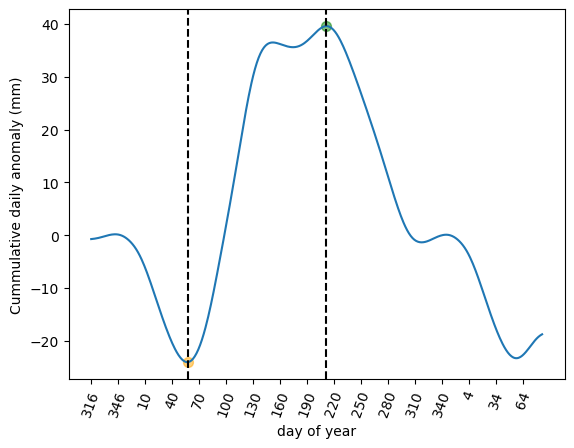

Season 1 -  base:  [57] [211] lt avg:  73.86842105263158 160.42105263157896
Season 2 -  base:  nan nan lt avg:  nan nan
Season 3 -  base:  nan nan lt avg:  nan nan
Letea Ward


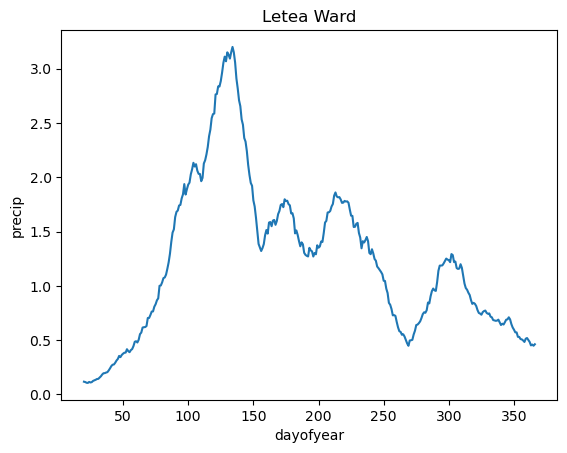

p1 0.06
p2 0.04
p3 0.03


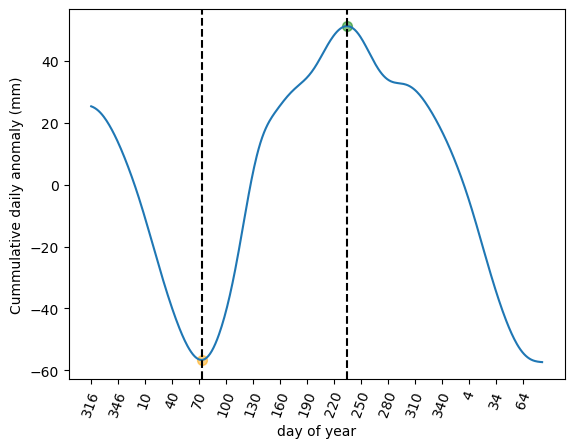

Season 1 -  base:  73 234 lt avg:  84.13888888888889 199.16666666666666
Season 2 -  base:  nan nan lt avg:  nan nan
Season 3 -  base:  nan nan lt avg:  nan nan
Songot Ward


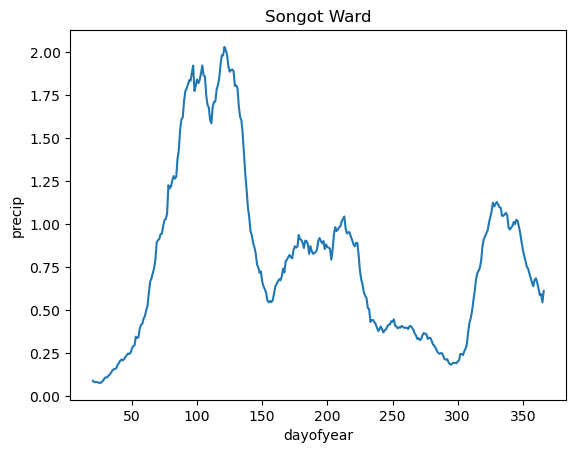

p1 0.04
p2 0.04
p3 0.06


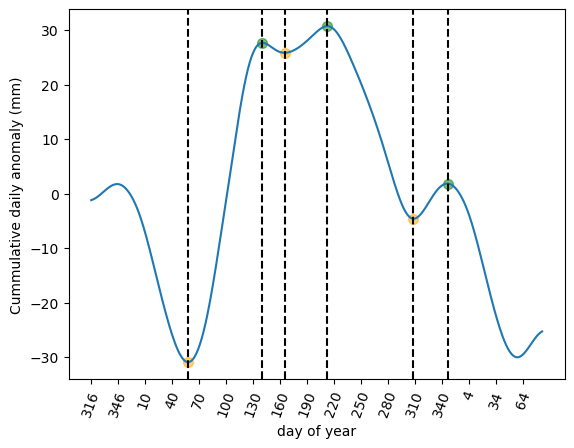

Season 1 -  base:  58 140 lt avg:  74.8780487804878 130.0731707317073
Season 2 -  base:  165 212 lt avg:  173.56666666666666 201.86666666666667
Season 3 -  base:  308 346 lt avg:  315.969696969697 339.3030303030303
Kerio Delta Ward


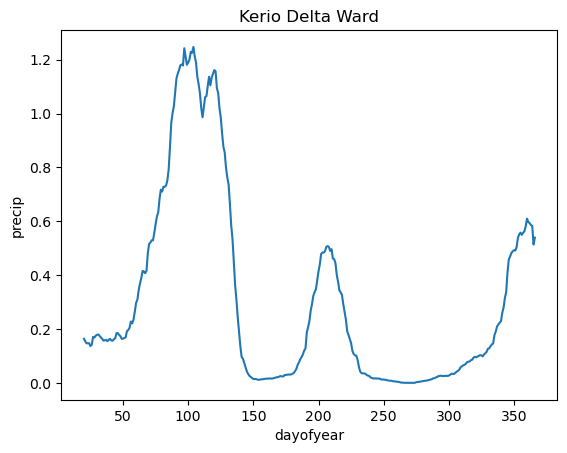

p1 0.06
p2 0.03
p3 0.07


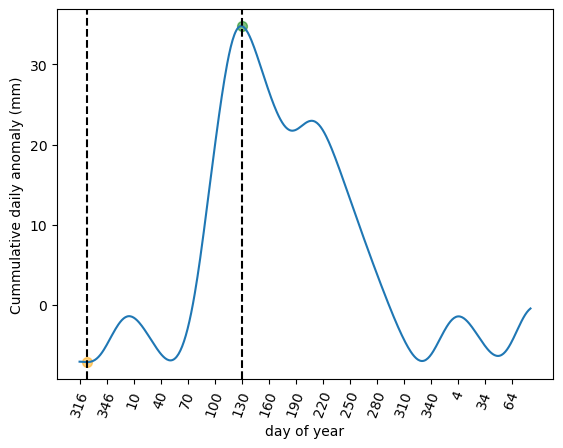

Season 1 -  base:  [324] [130] lt avg:  178.74358974358975 113.66666666666667
Season 2 -  base:  nan nan lt avg:  nan nan
Season 3 -  base:  nan nan lt avg:  nan nan
KANG'ATOTHA Ward


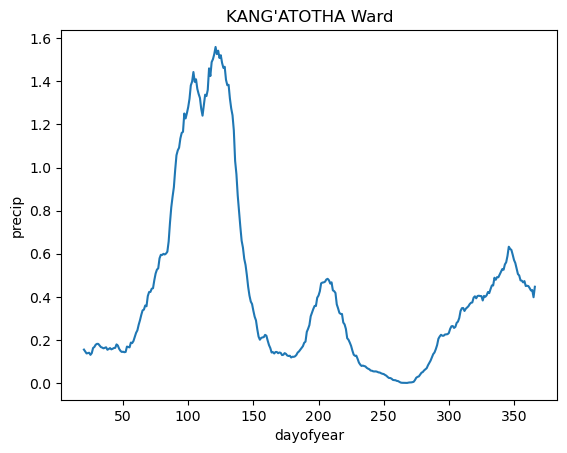

p1 0.05
p2 0.05
p3 0.05


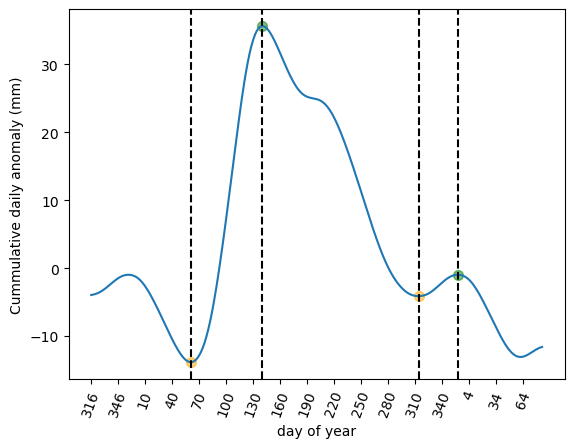

Season 1 -  base:  61 140 lt avg:  73.7 126.975
Season 2 -  base:  314 357 lt avg:  328.15625 316.65625
Season 3 -  base:  nan nan lt avg:  nan nan
Kalokol Ward


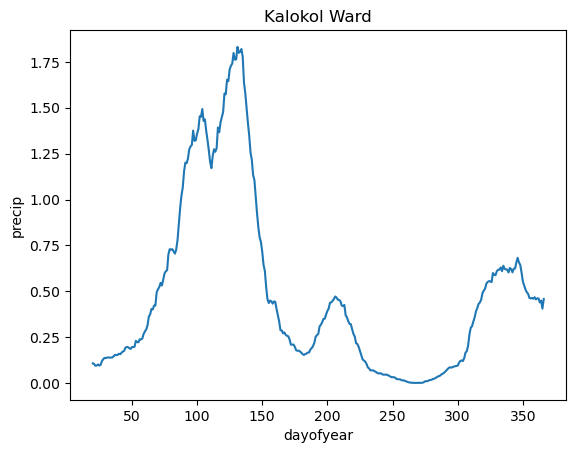

p1 0.05
p2 0.05
p3 0.04


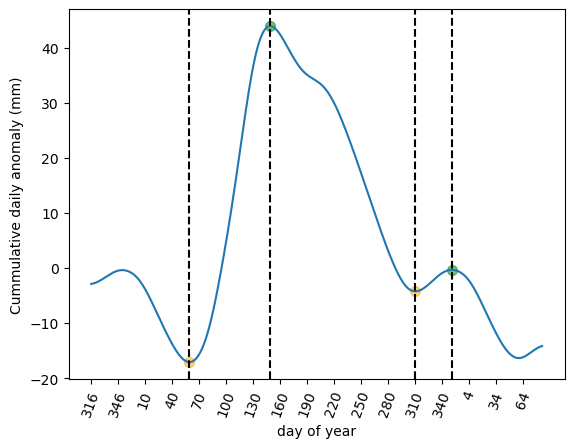

Season 1 -  base:  59 149 lt avg:  73.0 130.875
Season 2 -  base:  310 351 lt avg:  320.258064516129 329.0967741935484
Season 3 -  base:  nan nan lt avg:  nan nan
Kibish Ward


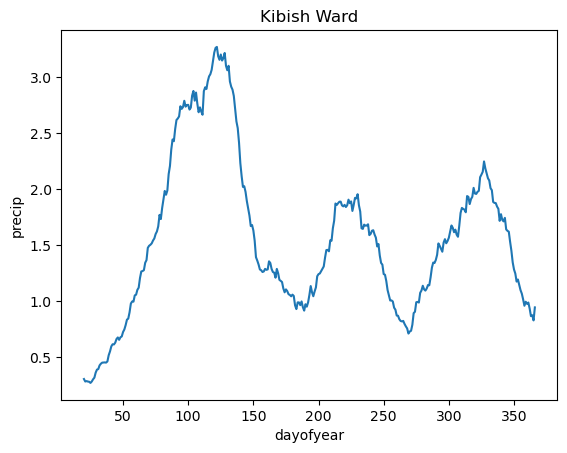

p1 0.03
p2 0.05
p3 0.04


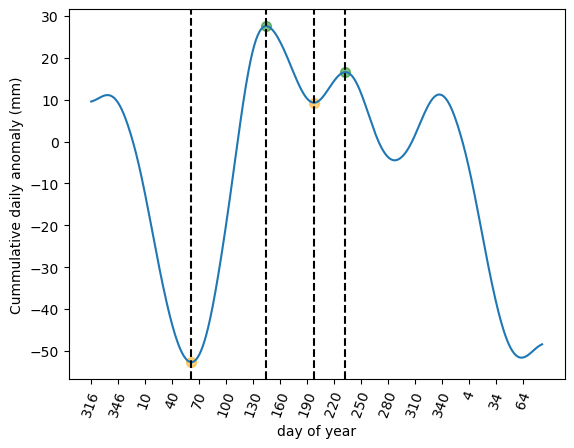

Season 1 -  base:  61 144 lt avg:  76.7560975609756 139.4390243902439
Season 2 -  base:  198 232 lt avg:  204.76666666666668 224.66666666666666
Season 3 -  base:  nan nan lt avg:  nan nan
Lokichoggio Ward


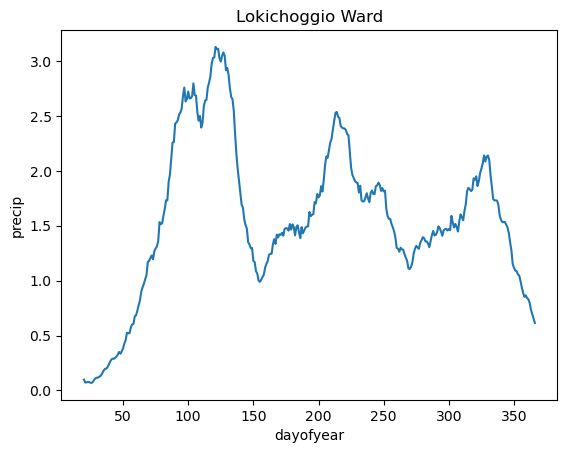

p1 0.04
p2 0.04
p3 0.05


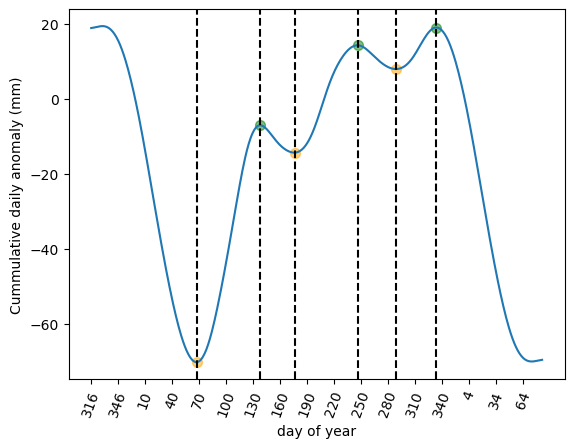

Season 1 -  base:  67 138 lt avg:  80.4 131.075
Season 2 -  base:  176 246 lt avg:  187.58064516129033 238.5483870967742
Season 3 -  base:  289 333 lt avg:  296.2692307692308 327.84615384615387
Turkwel Ward


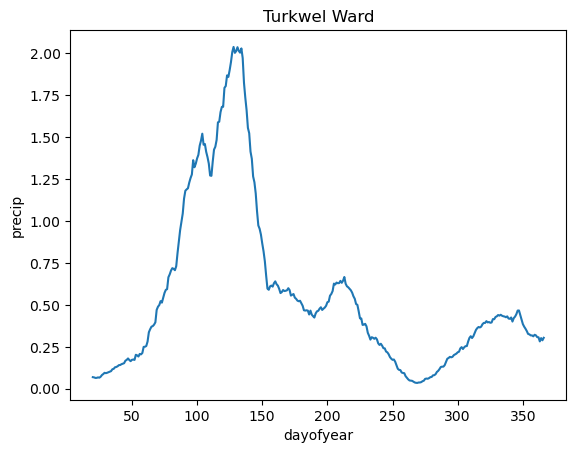

p1 0.06
p2 0.05
p3 0.04


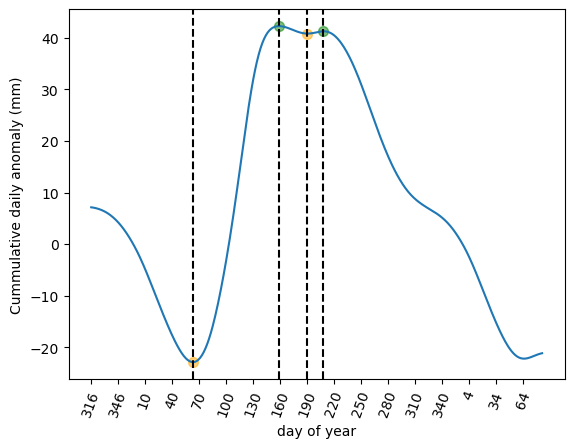

Season 1 -  base:  63 159 lt avg:  78.95 141.45
Season 2 -  base:  190 208 lt avg:  190.0 201.94285714285715
Season 3 -  base:  nan nan lt avg:  nan nan
Lokiriama-Lorengippi Ward


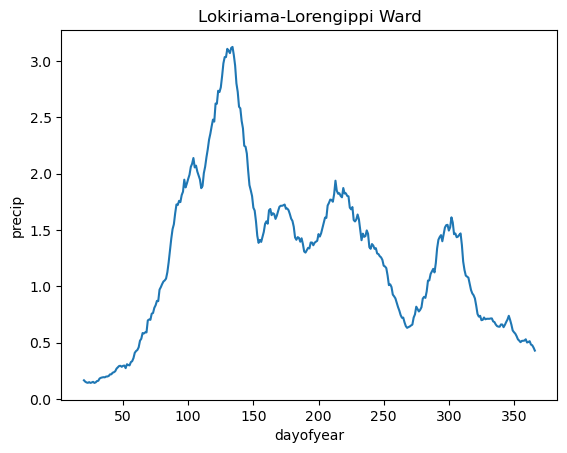

p1 0.06
p2 0.04
p3 0.02


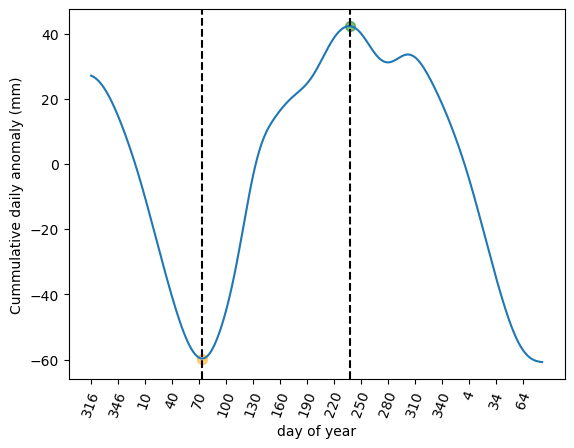

Season 1 -  base:  [73] [237] lt avg:  92.71794871794872 209.69230769230768
Season 2 -  base:  nan nan lt avg:  nan nan
Season 3 -  base:  nan nan lt avg:  nan nan
Kaputir Ward


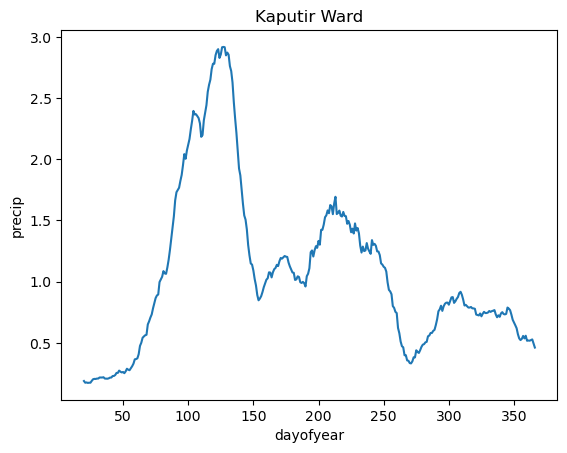

p1 0.06
p2 0.03
p3 0.05


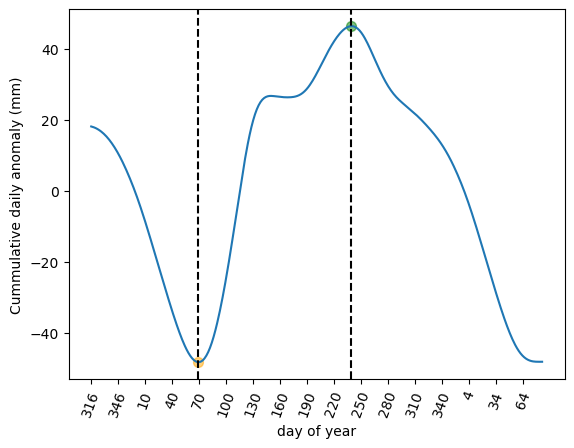

Season 1 -  base:  [69] [239] lt avg:  89.35 193.975
Season 2 -  base:  nan nan lt avg:  nan nan
Season 3 -  base:  nan nan lt avg:  nan nan
Lobokat Ward


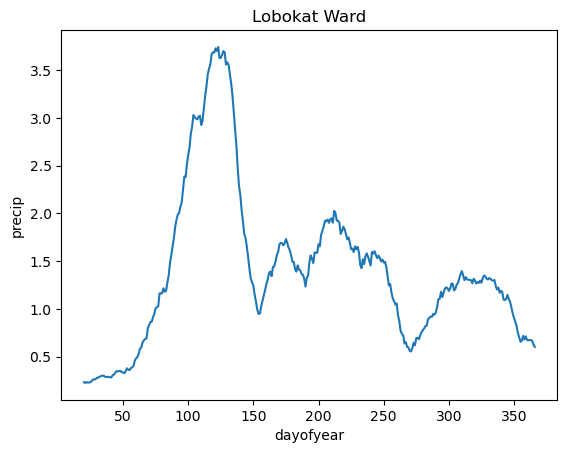

p1 0.05
p2 0.04
p3 0.04


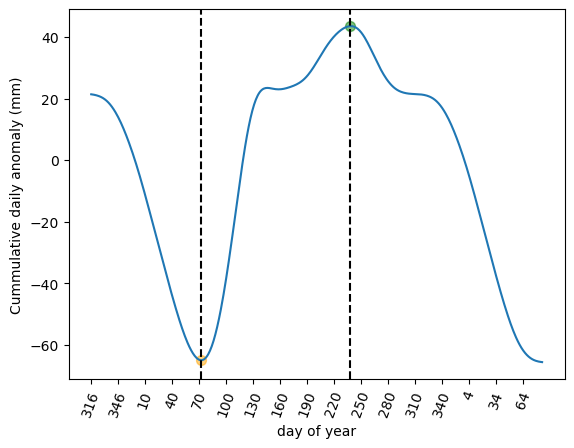

Season 1 -  base:  [72] [238] lt avg:  91.53846153846153 195.25641025641025
Season 2 -  base:  nan nan lt avg:  nan nan
Season 3 -  base:  nan nan lt avg:  nan nan
Kalapata Ward


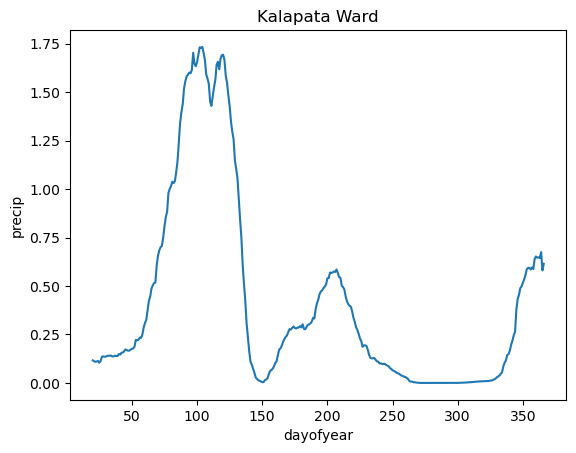

p1 0.07
p2 0.03
p3 0.07


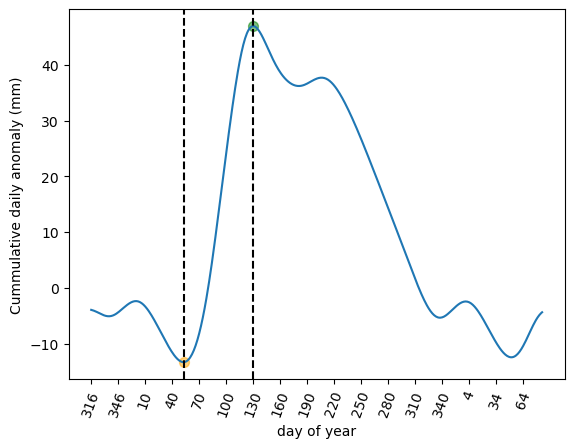

Season 1 -  base:  [53] [130] lt avg:  68.28205128205128 117.6923076923077
Season 2 -  base:  nan nan lt avg:  nan nan
Season 3 -  base:  nan nan lt avg:  nan nan
Lokichar Ward


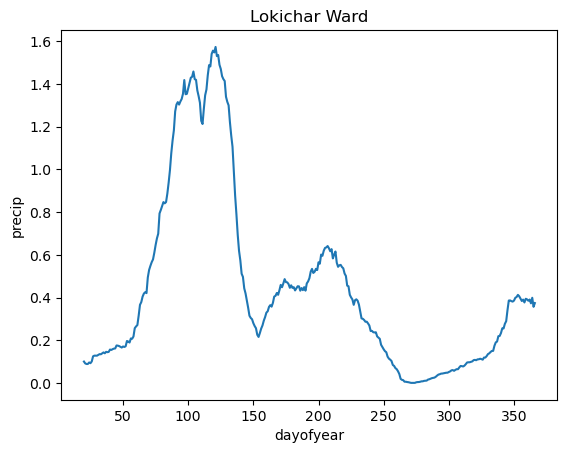

p1 0.07
p2 0.03
p3 0.06


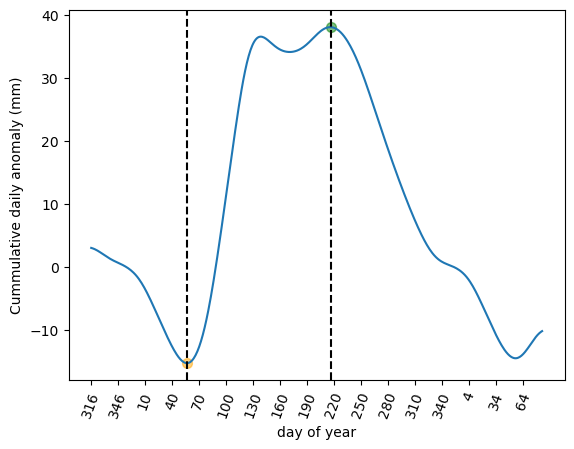

Season 1 -  base:  [56] [216] lt avg:  75.92307692307692 166.3846153846154
Season 2 -  base:  nan nan lt avg:  nan nan
Season 3 -  base:  nan nan lt avg:  nan nan
Kapedo-napeitom Ward


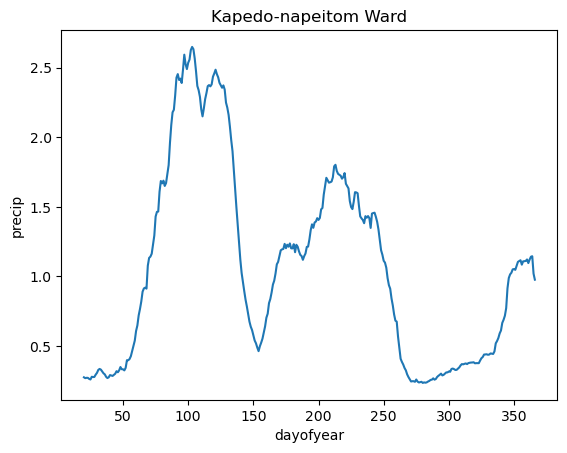

p1 0.05
p2 0.02
p3 0.07


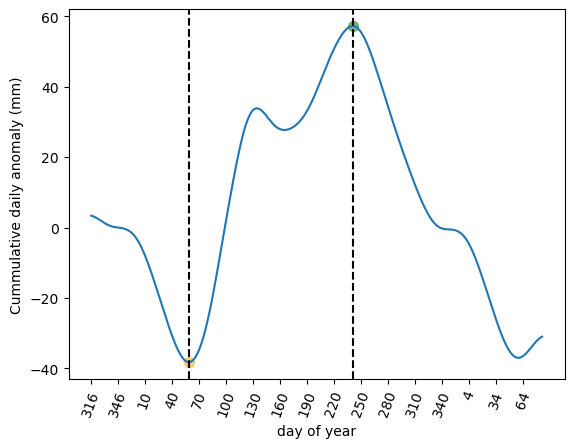

Season 1 -  base:  [59] [241] lt avg:  78.23684210526316 198.60526315789474
Season 2 -  base:  nan nan lt avg:  nan nan
Season 3 -  base:  nan nan lt avg:  nan nan
Kakuma Ward


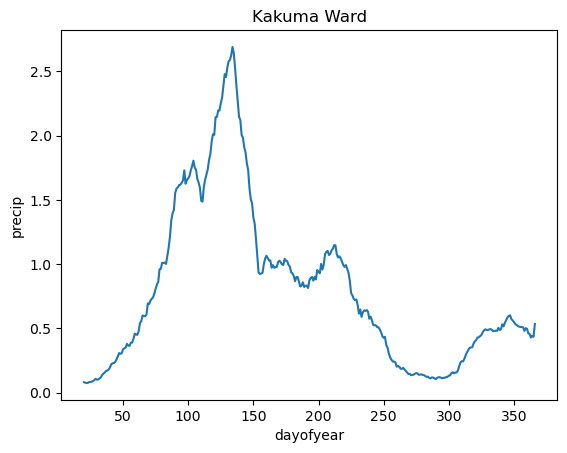

p1 0.06
p2 0.03
p3 0.03


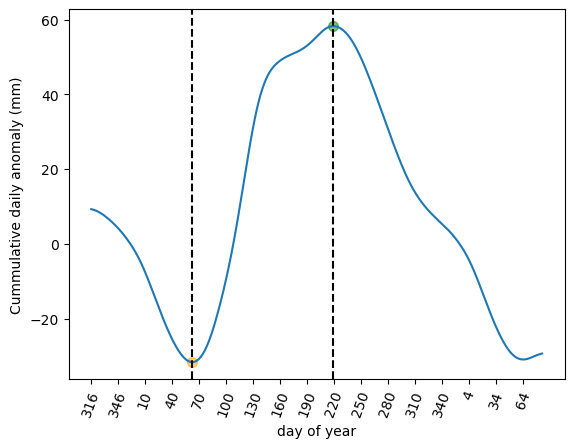

Season 1 -  base:  62 219 lt avg:  76.7 173.475
Season 2 -  base:  nan nan lt avg:  nan nan
Season 3 -  base:  nan nan lt avg:  nan nan
Kalobeyei Ward


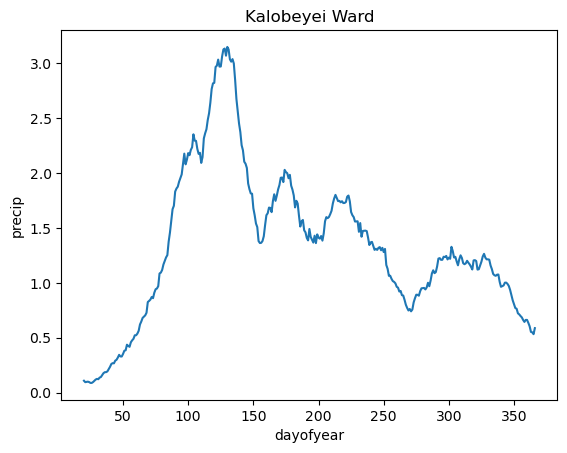

p1 0.05
p2 0.04
p3 0.03


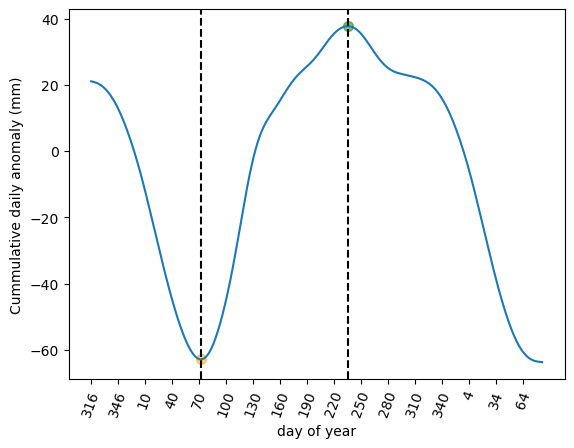

Season 1 -  base:  72 235 lt avg:  86.32432432432432 200.0810810810811
Season 2 -  base:  nan nan lt avg:  nan nan
Season 3 -  base:  nan nan lt avg:  nan nan
Nanaam Ward


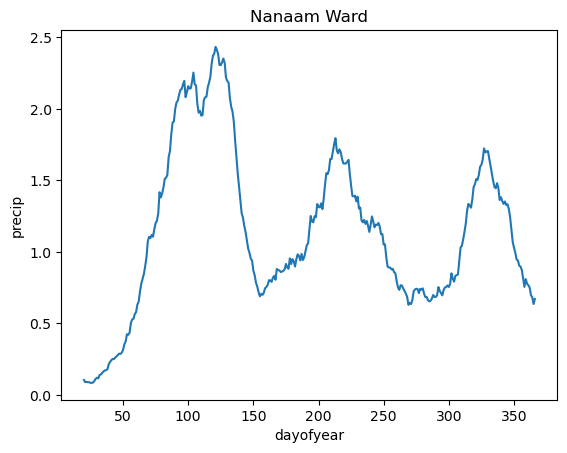

p1 0.03
p2 0.03
p3 0.06


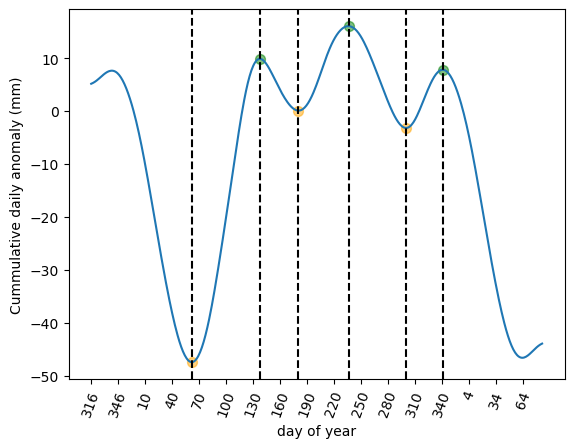

Season 1 -  base:  62 137 lt avg:  76.76923076923077 130.5897435897436
Season 2 -  base:  180 236 lt avg:  190.1290322580645 227.80645161290323
Season 3 -  base:  300 341 lt avg:  305.3235294117647 329.9117647058824
Lodwar Township Ward


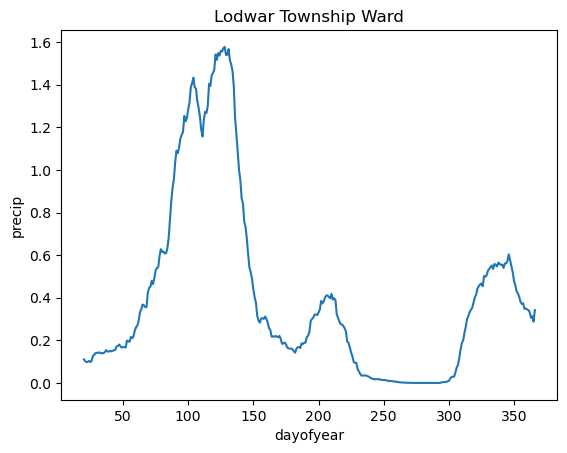

p1 0.05
p2 0.05
p3 0.05


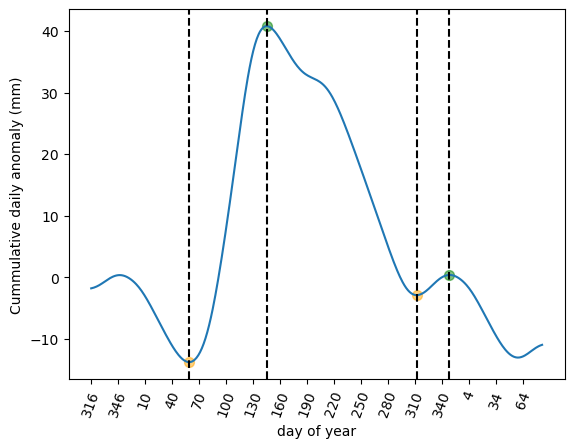

Season 1 -  base:  59 145 lt avg:  75.14634146341463 128.97560975609755
Season 2 -  base:  312 348 lt avg:  317.83870967741933 324.03225806451616
Season 3 -  base:  nan nan lt avg:  nan nan
Kanamkemer Ward


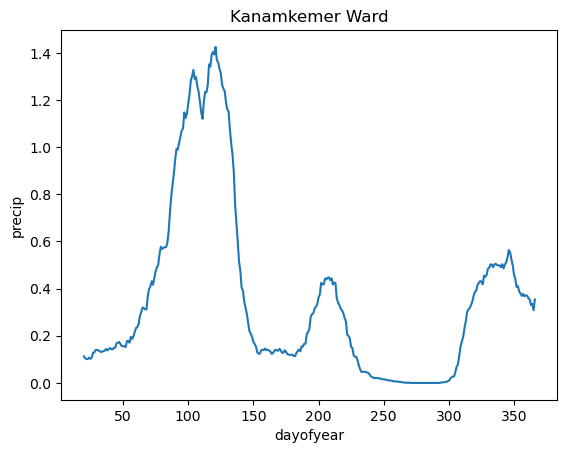

p1 0.05
p2 0.04
p3 0.06


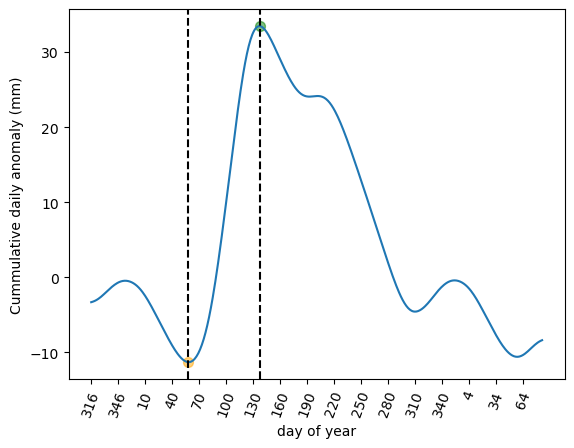

Season 1 -  base:  [58] [137] lt avg:  73.82926829268293 125.6829268292683
Season 2 -  base:  nan nan lt avg:  nan nan
Season 3 -  base:  nan nan lt avg:  nan nan
Kotaruk-Lobei Ward


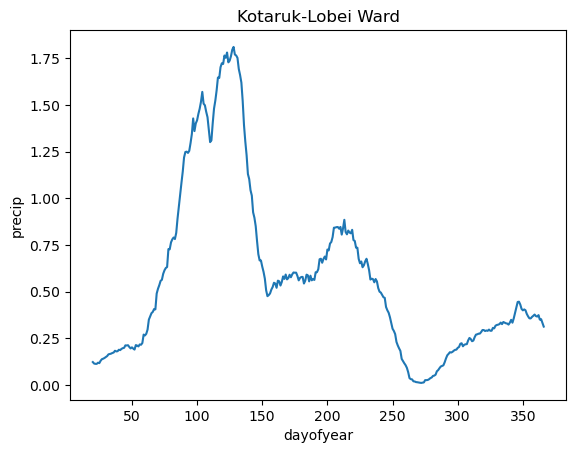

p1 0.06
p2 0.03
p3 0.05


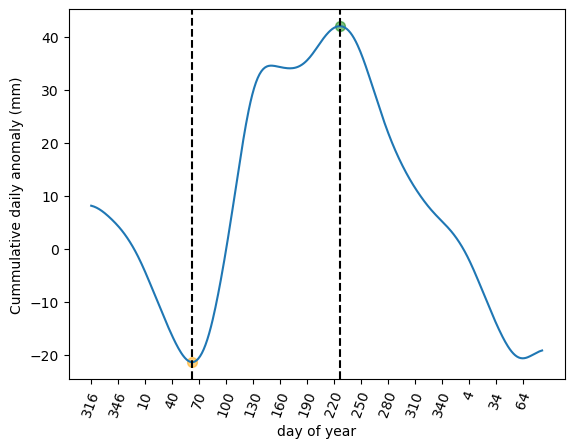

Season 1 -  base:  [62] [226] lt avg:  74.82051282051282 179.56410256410257
Season 2 -  base:  nan nan lt avg:  nan nan
Season 3 -  base:  nan nan lt avg:  nan nan
Loima Ward


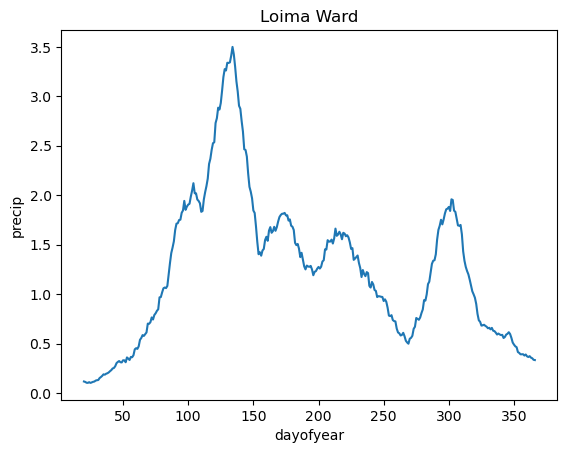

p1 0.05
p2 0.04
p3 0.01


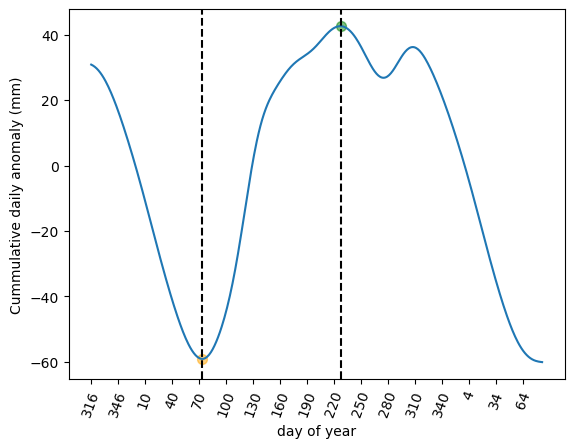

Season 1 -  base:  [73] [227] lt avg:  87.45945945945945 193.02702702702703
Season 2 -  base:  nan nan lt avg:  nan nan
Season 3 -  base:  nan nan lt avg:  nan nan
Katilu Ward


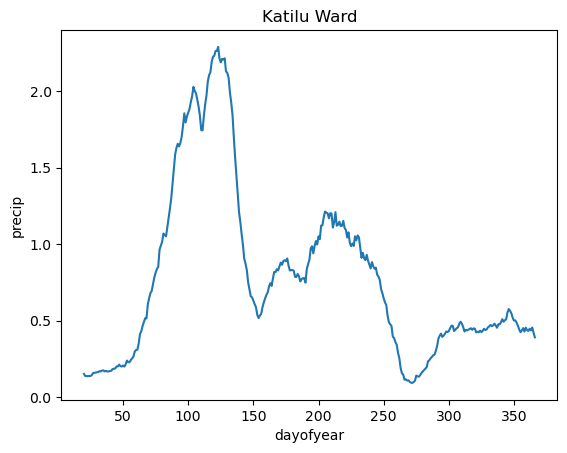

p1 0.06
p2 0.03
p3 0.05


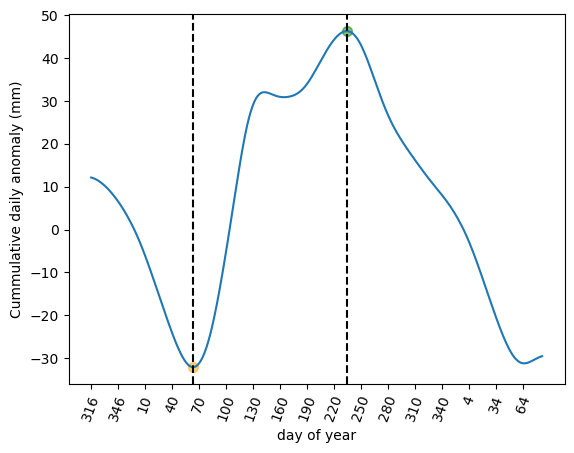

Season 1 -  base:  [63] [234] lt avg:  83.60526315789474 190.68421052631578
Season 2 -  base:  nan nan lt avg:  nan nan
Season 3 -  base:  nan nan lt avg:  nan nan
Katilia Ward


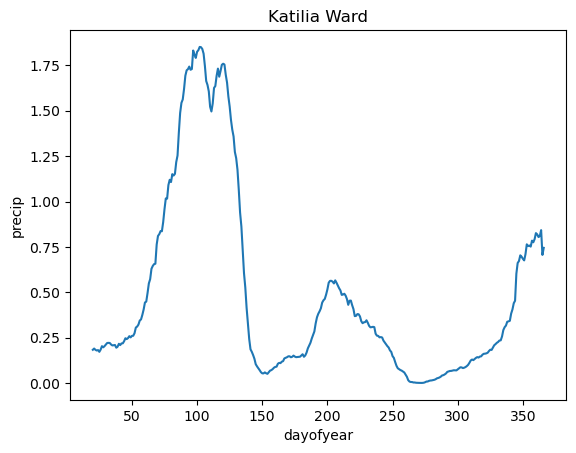

p1 0.06
p2 0.03
p3 0.07


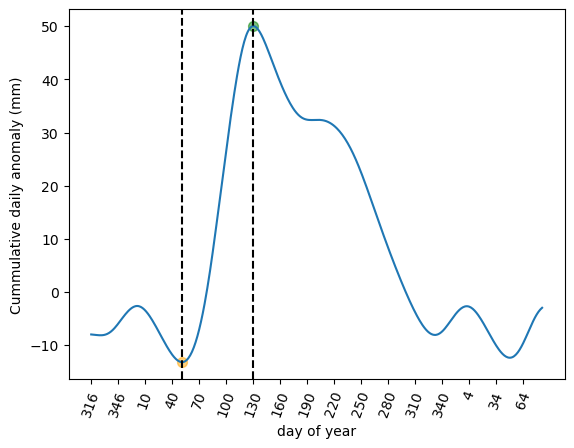

Season 1 -  base:  [51] [130] lt avg:  65.5 115.45238095238095
Season 2 -  base:  nan nan lt avg:  nan nan
Season 3 -  base:  nan nan lt avg:  nan nan
Lokori-kochodin Ward


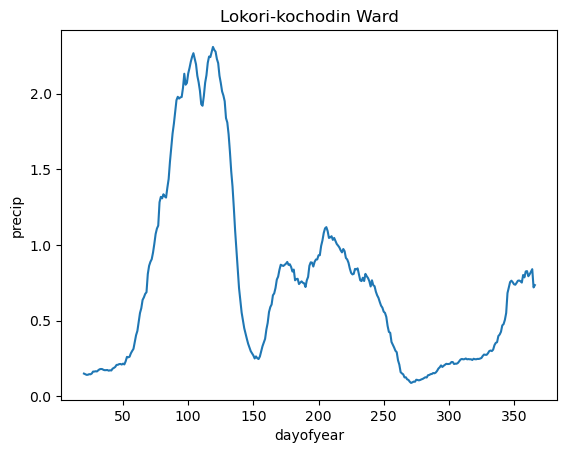

p1 0.06
p2 0.02
p3 0.07


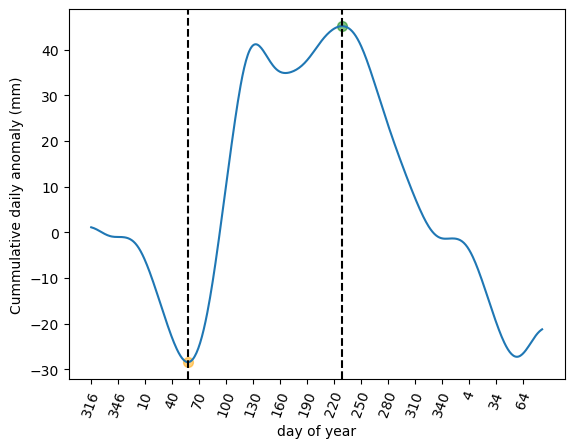

Season 1 -  base:  [58] [229] lt avg:  77.36842105263158 181.78947368421052
Season 2 -  base:  nan nan lt avg:  nan nan
Season 3 -  base:  nan nan lt avg:  nan nan


<Figure size 640x480 with 0 Axes>

In [43]:

for WARD in shape_w['ward']:
    shp = shape_w[shape_w['ward']==WARD]
    if WARD=='Kaaleng/kaikor Ward':
        WARD='Kaaleng-kaikor Ward'
    if WARD =='Lokiriama/Lorengippi Ward':
        WARD='Lokiriama-Lorengippi Ward'
    if WARD =='Kapedo/napeitom Ward':
        WARD='Kapedo-napeitom Ward'
    if WARD=='Kotaruk/Lobei Ward':
        WARD='Kotaruk-Lobei Ward'
    if WARD=='Lokori/kochodin Ward':
        WARD='Lokori-kochodin Ward'
    print(WARD)
    ptts = prw[WARD]['Full_ts'].mean(dim=('lat','lon'))
    ptday = ptts.groupby('time.dayofyear').mean('time')
    ptday.rolling(dayofyear=20).mean().plot()
    plt.title(WARD)
    plt.show()
    plt.clf()
    power_ratio,on1,ce1,on2,ce2,on3,ce3,on1_years,ce1_years,on2_years,ce2_years,on3_years,ce3_years = onc.xarray_on_cess_point(prw[WARD]['Full_ts'].mean(dim=('lat','lon')))
    print('Season 1 - ', 'base: ',on1, ce1, 'lt avg: ', on1_years.mean().values, ce1_years.mean().values)
    print('Season 2 - ', 'base: ',on2, ce2, 'lt avg: ', on2_years.mean().values, ce2_years.mean().values)
    print('Season 3 - ', 'base: ',on3, ce3, 'lt avg: ', on3_years.mean().values, ce3_years.mean().values)


In [44]:
#Characteristic onset and cessation dates for KMD/ICPAC method

## NDVI Section:
- Read in MODIS NDVI and apply scaling factor
- Create an array that is cut out for Turkana
- Plot an annual mean picutre of the NDVI for the whole county with enough regional context to inform migration decision-making

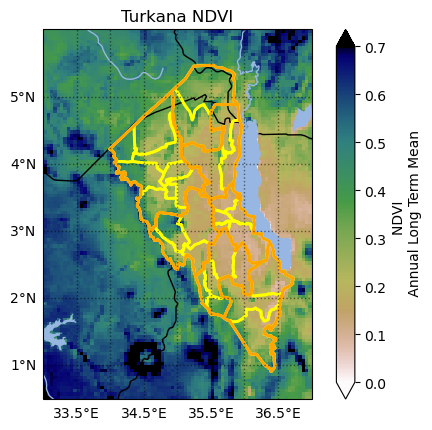

<Figure size 640x480 with 0 Axes>

In [45]:
modis_data_in = xr.open_dataarray("/Volumes/blue_wd/MODIS_61_VEG/modis_ndvi.nc")/10000.0
modis_data_in = modis_data_in.rio.set_spatial_dims(x_dim="lon",y_dim="lat")
ndvi = modis_data_in.rio.write_crs("epsg:4326", inplace=True)
ndvi_turkana = ndvi.rio.clip(shape_c.geometry.apply(mapping),shape_c.crs)

#Annual mean
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.RIVERS)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAKES)
#Overlay with all ward outline
shape_c.plot(ax=ax, edgecolor='pink',facecolor='none',lw=2,zorder=2,linestyle='-')
shape_w.plot(ax=ax, edgecolor='yellow',facecolor='none',lw=2,zorder=2,linestyle='-')
shape_sc.plot(ax=ax, edgecolor='orange',facecolor='none',lw=2,zorder=2,linestyle='-')
#Plot data
ndvi.mean('time').plot(ax=ax,transform=ccrs.PlateCarree(),
                                       add_colorbar=True,
                                       vmin=0,vmax=0.7,
                                       cmap=plt.cm.gist_earth_r,
                                       extend="both",
                                       cbar_kwargs={"label": "NDVI \n Annual Long Term Mean"})
# for extent the order is  [West,East,South,North]
ax.set_extent([lonw, lone, lats, latn])
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='black', alpha=0.5, linestyle='dotted')
gl.top_labels = False
gl.right_labels = False
ax.set_title('Turkana NDVI')
#plt.savefig(plot_out+"pr_ann_"+WARD+".png")
plt.show()
plt.clf()


Create a seasonal dictionary for NDVI
- not splitting into wards etc. because this information is being used for context

In [46]:
ndvid = {}
ndvid['Full_ts'] = ndvi
ndvid['MAM'] = ndvi.sel(time=ndvi.time.dt.month.isin([3,4,5]))
ndvid['JJA'] = ndvi.sel(time=ndvi.time.dt.month.isin([6,7,8]))
ndvid['S'] = ndvi.sel(time=ndvi.time.dt.month.isin([9]))
ndvid['OND'] = ndvi.sel(time=ndvi.time.dt.month.isin([10,11,12]))
ndvid['JF'] = ndvi.sel(time=ndvi.time.dt.month.isin([1,2]))

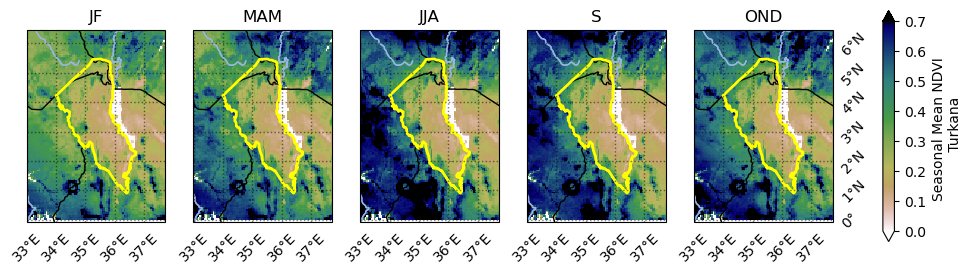

<Figure size 640x480 with 0 Axes>

In [47]:
# Seasonal means
fig, axes = plt.subplots(ncols=5, figsize=(13, 4),subplot_kw={'projection': ccrs.PlateCarree()},sharey=True)
for i, seas in enumerate(("JF", "MAM", "JJA", "S", "OND")):
    im = ndvid[seas].mean('time').plot.pcolormesh(
    ax=axes[i],
    transform=ccrs.PlateCarree(),
    vmin=0,
    vmax=0.7,
    cmap=plt.cm.gist_earth_r,
    add_colorbar=False,
    extend="both",
    )   
    axes[i].add_feature(cartopy.feature.BORDERS)
    axes[i].add_feature(cartopy.feature.RIVERS)
    axes[i].add_feature(cartopy.feature.RIVERS)
    shape_c.plot(ax=axes[i], edgecolor='yellow', facecolor='none',lw=2,zorder=2,linestyle='-')
    axes[i].set_extent([shape_c.bounds['minx']-1, shape_c.bounds['maxx']+1, shape_c.bounds['miny']-1, shape_c.bounds['maxy']+1])
    gl = axes[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='black', alpha=0.5, linestyle='dotted')
    gl.xlabel_style = {'rotation': 45}
    gl.ylabel_style = {'rotation': 45}
    gl.top_labels = False
    gl.right_labels = False
    gl.left_labels = False
    axes[i].set_title(seas)
    if i!=0:
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
    if i==0:
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Turkana')
        axes[i].yaxis.get_label().set_visible(True)
    if i==4:
        gl.right_labels = True
fig.colorbar(im, ax=axes,extend='both', shrink=0.75,label="Seasonal Mean NDVI \n "+"Turkana")   
plt.tight_layout
plt.savefig(plot_out+"ndvi_seas_Turkana.png")
plt.show()
plt.clf()

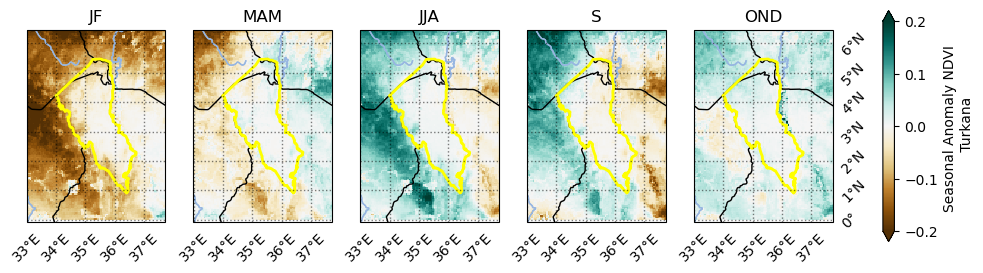

<Figure size 640x480 with 0 Axes>

In [48]:
# Seasonal anomalies
fig, axes = plt.subplots(ncols=5, figsize=(13, 4),subplot_kw={'projection': ccrs.PlateCarree()},sharey=True)
for i, seas in enumerate(("JF", "MAM", "JJA", "S", "OND")):
    anom = ndvid[seas].mean('time') - ndvid['Full_ts'].mean('time') 
    im = anom.plot.pcolormesh(
    ax=axes[i],
    transform=ccrs.PlateCarree(),
    vmin=-0.2,
    vmax=0.2,
    cmap=plt.cm.BrBG,
    add_colorbar=False,
    extend="both",
    )   
    axes[i].add_feature(cartopy.feature.BORDERS)
    axes[i].add_feature(cartopy.feature.RIVERS)
    axes[i].add_feature(cartopy.feature.RIVERS)
    shape_c.plot(ax=axes[i], edgecolor='yellow', facecolor='none',lw=2,zorder=2,linestyle='-')
    axes[i].set_extent([shape_c.bounds['minx']-1, shape_c.bounds['maxx']+1, shape_c.bounds['miny']-1, shape_c.bounds['maxy']+1])
    gl = axes[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='black', alpha=0.5, linestyle='dotted')
    gl.xlabel_style = {'rotation': 45}
    gl.ylabel_style = {'rotation': 45}
    gl.top_labels = False
    gl.right_labels = False
    gl.left_labels = False
    axes[i].set_title(seas)
    if i!=0:
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
    if i==0:
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Turkana')
        axes[i].yaxis.get_label().set_visible(True)
    if i==4:
        gl.right_labels = True
fig.colorbar(im, ax=axes,extend='both', shrink=0.75,label="Seasonal Anomaly NDVI \n "+"Turkana")   
plt.tight_layout
plt.savefig(plot_out+"ndvi_seasanom_Turkana.png")
plt.show()
plt.clf()